## Grouping by season in order to plot along elevation.

In [28]:
import s3fs
import xarray as xr
import s3fs
import seaborn as sns
import matplotlib.pyplot as plt
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", 
                       
                       secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", 
                       client_kwargs=dict(endpoint_url="https://rgw.met.no"))
s3.ls('escience2022')

['escience2022/Ada',
 'escience2022/Antoine',
 'escience2022/Dominic',
 'escience2022/ESA_SMOS_sss',
 'escience2022/Remy',
 'escience2022/Sara',
 'escience2022/Zhihong']

In [29]:
varl = ['N100','N200','N50', 'BC_AI', 'SS_A1','SS_A2','SS_A3'] 

In [30]:
path_to_data = 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/'
postfix = '_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc'

In [31]:
def make_file_path_for_var(v,):
    return path_to_data+v+postfix

In [32]:
filelist = [make_file_path_for_var(v) for v in varl]

In [33]:
list_of_s3_obj = [s3.open(s) for s in filelist]

ds_aero2012 = xr.open_mfdataset(list_of_s3_obj)

In [34]:
sulphate_varl = ['SO4_NA', 'SO4_A1', 'SO4_A2', 'SO4_AC','SO4_PR'] 

In [35]:
filelist = [make_file_path_for_var(v) for v in sulphate_varl]

In [36]:
list_of_s3_obj = [s3.open(s) for s in filelist]

ds2012 = xr.open_mfdataset(list_of_s3_obj)

In [37]:
ds2012['SO4_tot'] = 0
for var in sulphate_varl:
    ds2012['SO4_tot'] = ds2012['SO4_tot'] + ds2012[var]

ds2012['SO4_tot'].attrs['units'] = ds2012[var].attrs['units']

In [38]:
T_standard =  273.15 #K
p_standard = 1e5 #Pa
R = 287.058

rho = p_standard/(R*T_standard)

In [39]:
var = 'SO4_tot'
if ds2012[var].attrs['units'] =='kg/kg':
    ds2012[var] = ds2012[var]*rho
    ds2012[var].attrs['units'] = 'kg/m3'
    ## Change to ug/m3
    ds2012[var] = ds2012[var]*1e9
    ds2012[var].attrs['units'] = 'ug/m3'   

In [40]:
ds2012 =xr.merge([ds2012,ds_aero2012])

In [41]:
path_to_data = 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_ssp245/'
postfix = '_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2018-01-01_hour_locations.nc'

In [42]:
filelist = [make_file_path_for_var(v) for v in sulphate_varl]

In [43]:
list_of_s3_obj = [s3.open(s) for s in filelist]
ds = xr.open_mfdataset(list_of_s3_obj)

In [44]:
ds['SO4_tot'] = 0
for var in sulphate_varl:
    ds['SO4_tot'] = ds['SO4_tot'] + ds[var]

ds['SO4_tot'].attrs['units'] = ds[var].attrs['units']

In [45]:
var = 'SO4_tot'
if ds[var].attrs['units'] =='kg/kg':
    ds[var] = ds[var]*rho
    ds[var].attrs['units'] = 'kg/m3'
    ## Change to ug/m3
    ds[var] = ds[var]*1e9
    ds[var].attrs['units'] = 'ug/m3'

In [46]:
varl = ['N100','N200','N50', 'BC_AI', 'SS_A1','SS_A2','SS_A3'] 

In [47]:
filelist = [make_file_path_for_var(v) for v in varl]

In [48]:
list_of_s3_obj = [s3.open(s) for s in filelist]
ds_aero = xr.open_mfdataset(list_of_s3_obj)

In [49]:
ds =xr.merge([ds,ds_aero])

In [50]:
ds2012= ds2012.sel(time= slice('2012-01-01','2014-12-31'))

In [51]:
ds = xr.merge([ds2012,ds])#,join='left')
ds.compute()

<xarray.Dataset>
Dimensions:   (lev: 32, time: 52632, location: 5)
Coordinates:
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * time      (time) datetime64[ns] 2012-01-02 ... 2018-01-02T23:00:00
  * location  (location) object 'Puijo' 'Zeppelin' ... 'Pallas' 'Jungfraujoch'
Data variables: (12/13)
    SO4_A1    (location, time, lev) float32 2.541e-13 1.372e-13 ... 5.866e-12
    SO4_A2    (location, time, lev) float32 2.406e-17 3.728e-17 ... 9.327e-11
    SO4_AC    (location, time, lev) float32 4.202e-17 1.356e-17 ... 2.163e-13
    SO4_NA    (location, time, lev) float32 3.873e-13 2.309e-13 ... 3.032e-12
    SO4_PR    (location, time, lev) float32 8.458e-15 4.064e-15 ... 1.374e-11
    SO4_tot   (location, time, lev) float64 0.0008288 0.0004748 ... 0.1481
    ...        ...
    N100      (location, time, lev) float64 0.003671 0.004514 ... 53.48 164.1
    N200      (location, time, lev) float64 7.565e-05 9.453e-05 ... 9.551 28.56
    N50       (location, time, lev) float64 0.03781 0.047 0.2253 ... 159.1 437.4
    SS_A1     (location, time, lev) float32 2.527e-23 1.084e-22 ... 9.831e-11
    SS_A2     (location, time, lev) float32 2.14e-25 1.133e-25 ... 6.596e-10
    SS_A3     (location, time, lev) float32 1.63e-28 1.742e-28 ... 2.424e-09

In [52]:
ds_season = ds.groupby('time.season').mean()
ds_season['SO4_tot'].attrs['units'] = 'ug/m3'
ds_season['SO4_tot'].attrs['long_name'] = 'Total Sulphate Concentration'
ds_season['N100'].attrs['units'] = 'm$^-3$'
ds_season['N100'].attrs['long_name'] = 'N$_100$'
ds_season

<xarray.Dataset>
Dimensions:   (location: 5, season: 4, lev: 32)
Coordinates:
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * location  (location) object 'Puijo' 'Zeppelin' ... 'Pallas' 'Jungfraujoch'
  * season    (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables: (12/13)
    SO4_A1    (location, season, lev) float32 dask.array<chunksize=(5, 1, 32), meta=np.ndarray>
    SO4_A2    (location, season, lev) float32 dask.array<chunksize=(5, 1, 32), meta=np.ndarray>
    SO4_AC    (location, season, lev) float32 dask.array<chunksize=(5, 1, 32), meta=np.ndarray>
    SO4_NA    (location, season, lev) float32 dask.array<chunksize=(5, 1, 32), meta=np.ndarray>
    SO4_PR    (location, season, lev) float32 dask.array<chunksize=(5, 1, 32), meta=np.ndarray>
    SO4_tot   (location, season, lev) float64 dask.array<chunksize=(5, 1, 32), meta=np.ndarray>
    ...        ...
    N100      (location, season, lev) float64 dask.array<chunksize=(5, 1, 32), meta=np.ndarray>
    N200      (location, season, lev) float64 dask.array<chunksize=(5, 1, 32), meta=np.ndarray>
    N50       (location, season, lev) float64 dask.array<chunksize=(5, 1, 32), meta=np.ndarray>
    SS_A1     (location, season, lev) float32 dask.array<chunksize=(5, 1, 32), meta=np.ndarray>
    SS_A2     (location, season, lev) float32 dask.array<chunksize=(5, 1, 32), meta=np.ndarray>
    SS_A3     (location, season, lev) float32 dask.array<chunksize=(5, 1, 32), meta=np.ndarray>

In [53]:
ds_season = ds_season.load()

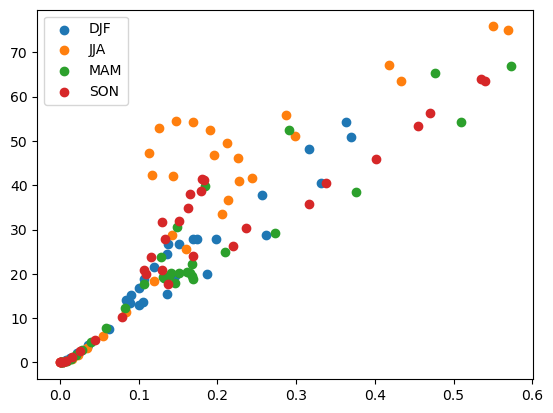

In [54]:
for seas in ds_season.season:
    plt.scatter(x = ds_season['SO4_tot'].sel(season=seas,location = 'Zeppelin'), 
                y = ds_season['N100'].sel(season=seas,location = 'Zeppelin'),
                label=seas.values)
                
plt.legend()

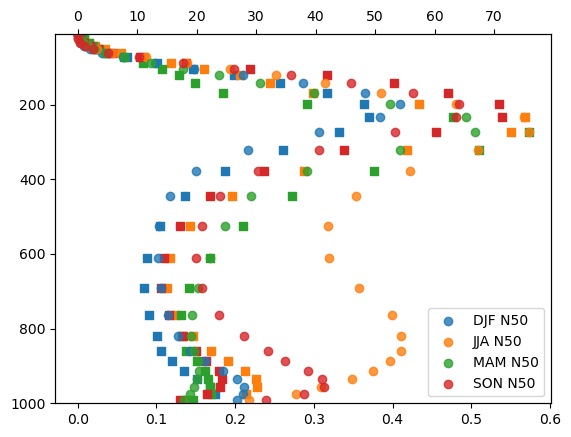

In [55]:
ig, ax1 = plt.subplots()

for seas in ds_season.season:
    ax1.scatter(x = ds_season['SO4_tot'].sel(season=seas,location = 'Zeppelin'), 
                y = ds_season['lev'],
                marker = 's',
                label=f'{seas.values} SO4')
ax1.set_ylim(ax1.get_ylim()[::-1])

ax2 = ax1.twiny() 
for seas in ds_season.season:
    ax2.scatter(x = ds_season['N100'].sel(season=seas,location = 'Zeppelin'), 
                y = ds_season['lev'],
                label=f'{seas.values} N50', alpha = 0.8)

ax1.set_ylim([1000,10])
plt.legend()

In [56]:
percentage_SO4 = (ds_season['SO4_tot']/(ds_season['SO4_tot'].max()))
percentage_N100 = (ds_season['N100']/(ds_season['N100'].max()))
percentage_SO4 = percentage_SO4.load()
percentage_N100 = percentage_N100.load()

In [57]:
factor = percentage_SO4 / percentage_N100
N100_div_SO4 = percentage_N100/percentage_SO4

(1042.0017265947536, -45.80216577742249)

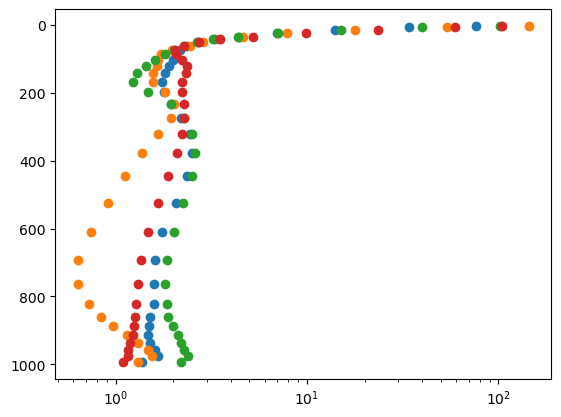

In [58]:
fig, ax = plt.subplots()
for seas in factor.season:
    ax.scatter(x= factor.sel(season=seas,location = 'Zeppelin'),
               y= factor['lev'],
              label=seas.values)
ax.set_xscale('log')
ax.set_ylim(ax.get_ylim()[::-1])

(1042.0017265947536, -45.80216577742249)

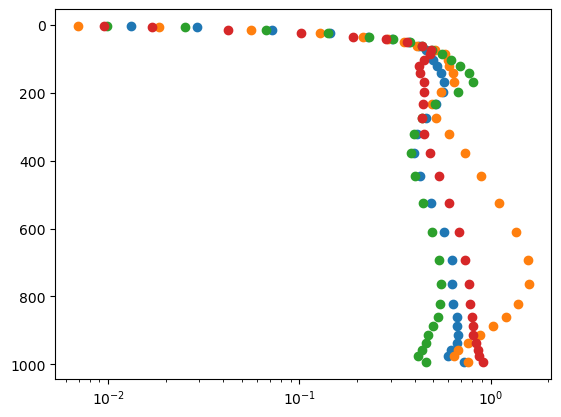

In [59]:
fig, ax = plt.subplots()
for seas in N100_div_SO4.season:
    ax.scatter(x= N100_div_SO4.sel(season=seas,location = 'Zeppelin'),
               y= N100_div_SO4['lev'],
              label=seas.values)
ax.set_xscale('log')
ax.set_ylim(ax.get_ylim()[::-1])

### BC vs N50 and N100

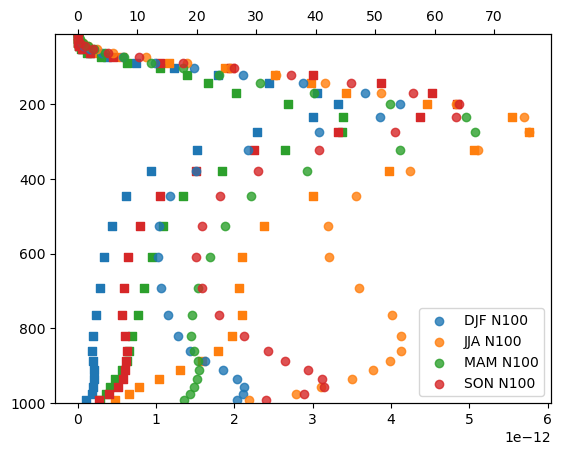

In [60]:
ig, ax1 = plt.subplots()

for seas in ds_season.season:
    ax1.scatter(x = ds_season['BC_AI'].sel(season=seas,location = 'Zeppelin'), 
                y = ds_season['lev'],
                marker = 's',
                label=f'{seas.values} BC_AI')
ax1.set_ylim(ax1.get_ylim()[::-1])

ax2 = ax1.twiny() 
for seas in ds_season.season:
    ax2.scatter(x = ds_season['N100'].sel(season=seas,location = 'Zeppelin'), 
                y = ds_season['lev'],
                label=f'{seas.values} N100', alpha = 0.8)

ax1.set_ylim([1000,10])
plt.legend()

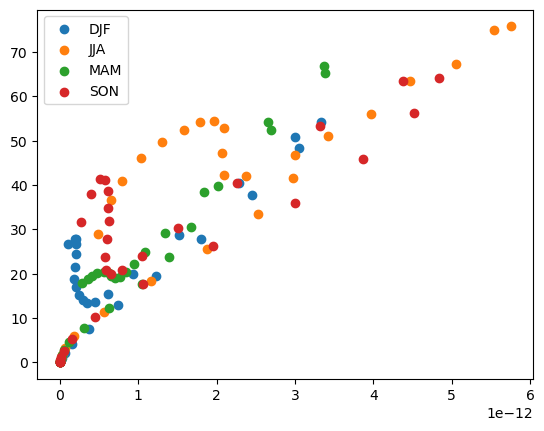

In [61]:
for seas in ds_season.season:
    plt.scatter(x = ds_season['BC_AI'].sel(season=seas,location = 'Zeppelin'), 
                y = ds_season['N100'].sel(season=seas,location = 'Zeppelin'),
                label=seas.values)
                
plt.legend()

## Daily resample and the N50 and N100 ploted against SO4 total

In [62]:
ds_daily = ds.resample(time='d').mean('time')
ds_daily['season']= ds_daily['time.season']

ds_daily

<xarray.Dataset>
Dimensions:   (location: 5, time: 2193, lev: 32)
Coordinates:
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * location  (location) object 'Puijo' 'Zeppelin' ... 'Pallas' 'Jungfraujoch'
  * time      (time) datetime64[ns] 2012-01-02 2012-01-03 ... 2018-01-02
Data variables: (12/14)
    SO4_A1    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_A2    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_AC    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_NA    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_PR    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_tot   (location, time, lev) float64 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    ...        ...
    N200      (location, time, lev) float64 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    N50       (location, time, lev) float64 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SS_A1     (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SS_A2     (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SS_A3     (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    season    (time) <U3 'DJF' 'DJF' 'DJF' 'DJF' ... 'DJF' 'DJF' 'DJF' 'DJF'

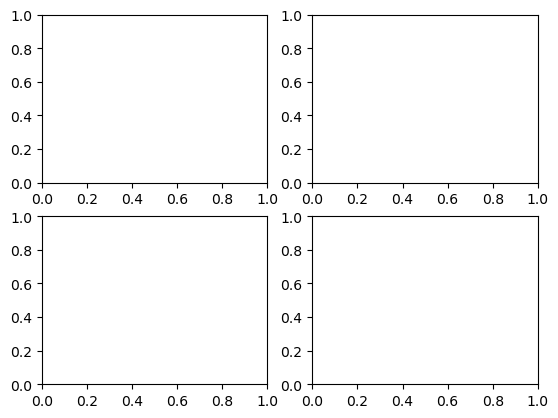

In [63]:
fig, axs = plt.subplots(2,2)



In [64]:
ds_daily

<xarray.Dataset>
Dimensions:   (location: 5, time: 2193, lev: 32)
Coordinates:
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * location  (location) object 'Puijo' 'Zeppelin' ... 'Pallas' 'Jungfraujoch'
  * time      (time) datetime64[ns] 2012-01-02 2012-01-03 ... 2018-01-02
Data variables: (12/14)
    SO4_A1    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_A2    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_AC    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_NA    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_PR    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_tot   (location, time, lev) float64 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    ...        ...
    N200      (location, time, lev) float64 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    N50       (location, time, lev) float64 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SS_A1     (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SS_A2     (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SS_A3     (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    season    (time) <U3 'DJF' 'DJF' 'DJF' 'DJF' ... 'DJF' 'DJF' 'DJF' 'DJF'

In [65]:
_ds = ds_daily.sel(location='Zeppelin').isel(lev=-1)


_ds =_ds.load()

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


In [66]:
_ds['season'] = _ds['time.season']

In [69]:
import numpy as np
from sklearn.linear_model import LinearRegression

DJF
 
170.1 x + 36.31
coefficient of determination: 0.14596577100628305
MAM
 
310.6 x + 23.64
coefficient of determination: 0.3677092142024211
JJA
 
350.9 x + 49.33
coefficient of determination: 0.3545305617608683
SON
 
357.1 x + 24.44
coefficient of determination: 0.4260601825722423


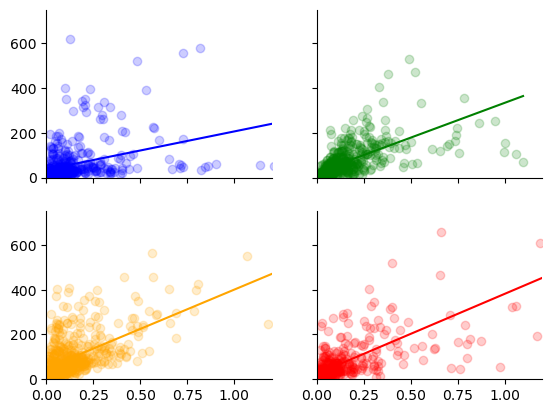

In [70]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])



for seas, ax, col in zip(['DJF','MAM','JJA','SON'], axs.flatten(),['blue','green','orange','red']):
    print(seas)
    _dss = _ds.where(_ds['season']==seas)
    _dss = _dss.to_dataframe().dropna()
    ax.scatter(x=_dss['SO4_tot'], y=_dss['N50'],c= col, alpha = 0.2)
    z = np.polyfit(_dss['SO4_tot'], _dss['N50'], 1)
    p = np.poly1d(z)
    x= np.linspace(_dss['SO4_tot'].min(), _dss['SO4_tot'].max())
    ax.plot( x, p(x), c = col, )
    print(p)
    ax.set_ylim ([0,750])
    ax.set_xlim ([0,1.2])
    #ax.set_yscale ('log')
    #ax.set_xscale ('log')
    
    #Calculating R-Squared
    x = np.array([_dss['SO4_tot']]).reshape((-1, 1))
    model = LinearRegression().fit (x, _dss['N50'])
    r_sq = model.score(x, _dss['N50'])
    print(f"coefficient of determination: {r_sq}")
    
    sns.despine()

DJF
 
170.1 x + 36.31
coefficient of determination: 0.14596577100628305
MAM
 
310.6 x + 23.64
coefficient of determination: 0.3677092142024211
JJA
 
350.9 x + 49.33
coefficient of determination: 0.3545305617608683
SON
 
357.1 x + 24.44
coefficient of determination: 0.4260601825722423


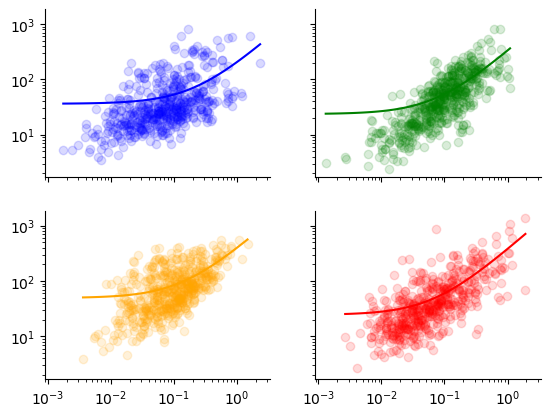

In [71]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])



for seas, ax, col in zip(['DJF','MAM','JJA','SON'], axs.flatten(),['blue','green','orange','red']):
    print(seas)
    _dss = _ds.where(_ds['season']==seas)
    _dss = _dss.to_dataframe().dropna()
    ax.scatter(x=_dss['SO4_tot'], y=_dss['N50'],c= col, alpha = 0.15)
    z = np.polyfit(_dss['SO4_tot'], _dss['N50'], 1)
    p = np.poly1d(z)
    x= np.logspace(np.log10(_dss['SO4_tot'].min()), np.log10(_dss['SO4_tot'].max()))
    ax.plot( x, p(x), c = col, )
    print(p)
    #ax.set_ylim ([0,750])
    #ax.set_xlim ([0,1.2])
    ax.set_yscale ('log')
    ax.set_xscale ('log')
    
    #Calculating R-Squared
    x = np.array([_dss['SO4_tot']]).reshape((-1, 1))
    model = LinearRegression().fit (x, _dss['N50'])
    r_sq = model.score(x, _dss['N50'])
    print(f"coefficient of determination: {r_sq}")
    
    sns.despine()

DJF
MAM
JJA
SON


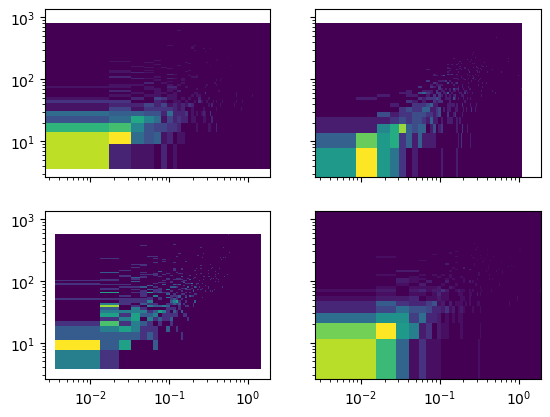

In [72]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])



for seas, ax, col in zip(['DJF','MAM','JJA','SON'], axs.flatten(),['blue','green','orange','red']):
    print(seas)
    _dss = _ds.where(_ds['season']==seas)
    _dss = _dss.to_dataframe().dropna()
    ax.hist2d(x=_dss['SO4_tot'], y=_dss['N50'],bins = 150)
    #z = np.polyfit(_dss['SO4_tot'], _dss['N50'], 1)
    #p = np.poly1d(z)
    #ax.plot( _dss['SO4_tot'], p( _dss['SO4_tot']), c = col, )
    #print(p)
    #ax.set_ylim ([7,100])
    #ax.set_xlim ([0.007,0.2])
    ax.set_yscale ('log')
    ax.set_xscale ('log')

DJF
 
89.41 x + 14.9
coefficient of determination: 0.1524247792079021
MAM
 
77.79 x + 6.46
coefficient of determination: 0.39605535764995203
JJA
 
135.2 x + 9.687
coefficient of determination: 0.5153111406507862
SON
 
145.7 x + 11.75
coefficient of determination: 0.4272405732083431


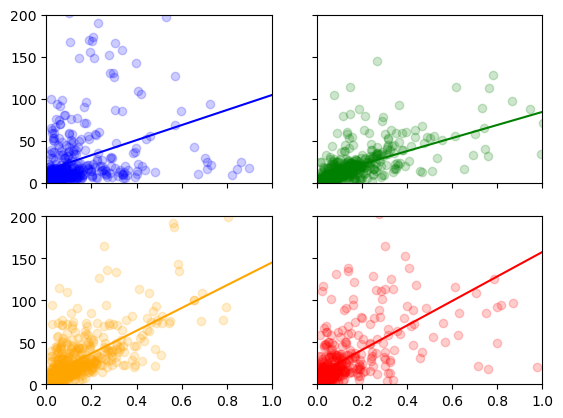

In [73]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])



for seas, ax, col in zip(['DJF','MAM','JJA','SON'], axs.flatten(),['blue','green','orange','red']):
    print(seas)
    _dss = _ds.where(_ds['season']==seas)
    _dss = _dss.to_dataframe().dropna()
    ax.scatter(x=_dss['SO4_tot'], y=_dss['N100'],c= col, alpha = 0.2)
    z = np.polyfit(_dss['SO4_tot'], _dss['N100'], 1)
    p = np.poly1d(z)
    x= np.linspace(_dss['SO4_tot'].min(), _dss['SO4_tot'].max())
    ax.plot( x, p(x), c = col, )
    print(p)
    ax.set_ylim ([0,200])
    ax.set_xlim ([0,1])
    #ax.set_yscale ('log')
    #ax.set_xscale ('log')
    
    #Calculating R-Squared
    x = np.array([_dss['SO4_tot']]).reshape((-1, 1))
    model = LinearRegression().fit (x, _dss['N100'])
    r_sq = model.score(x, _dss['N100'])
    print(f"coefficient of determination: {r_sq}")

DJF
 
89.41 x + 14.9
coefficient of determination: 0.1524247792079021
MAM
 
77.79 x + 6.46
coefficient of determination: 0.39605535764995203
JJA
 
135.2 x + 9.687
coefficient of determination: 0.5153111406507862
SON
 
145.7 x + 11.75
coefficient of determination: 0.4272405732083431


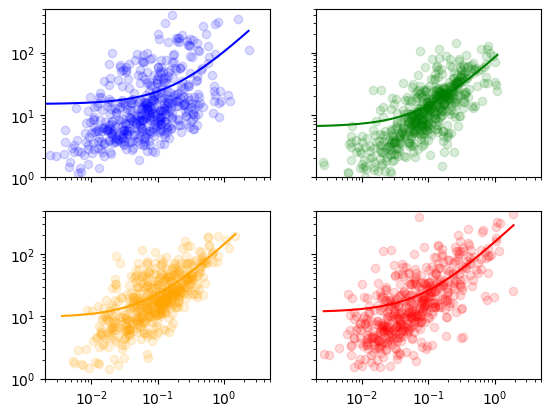

In [74]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])



for seas, ax, col in zip(['DJF','MAM','JJA','SON'], axs.flatten(),['blue','green','orange','red']):
    print(seas)
    _dss = _ds.where(_ds['season']==seas)
    _dss = _dss.to_dataframe().dropna()
    ax.scatter(x=_dss['SO4_tot'], y=_dss['N100'],c= col, alpha = 0.15)
    z = np.polyfit(_dss['SO4_tot'], _dss['N100'], 1)
    p = np.poly1d(z)
    x= np.logspace(np.log10(_dss['SO4_tot'].min()), np.log10(_dss['SO4_tot'].max()))
    ax.plot( x, p(x), c = col, )
    print(p)
    ax.set_ylim ([1,500])
    ax.set_xlim ([0.002,5])
    ax.set_yscale ('log')
    ax.set_xscale ('log')
    
    #Calculating R-Squared
    x = np.array([_dss['SO4_tot']]).reshape((-1, 1))
    model = LinearRegression().fit (x, _dss['N100'])
    r_sq = model.score(x, _dss['N100'])
    print(f"coefficient of determination: {r_sq}")

DJF
MAM
JJA
SON


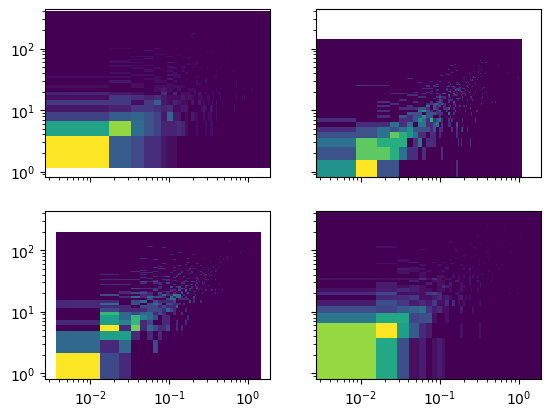

In [75]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])



for seas, ax, col in zip(['DJF','MAM','JJA','SON'], axs.flatten(),['blue','green','orange','red']):
    print(seas)
    _dss = _ds.where(_ds['season']==seas)
    _dss = _dss.to_dataframe().dropna()
    ax.hist2d(x=_dss['SO4_tot'], y=_dss['N100'],bins = 150, )
    #z = np.polyfit(_dss['SO4_tot'], _dss['N50'], 1)
    #p = np.poly1d(z)
    #ax.plot( _dss['SO4_tot'], p( _dss['SO4_tot']), c = col, )
    #print(p)
    #ax.set_ylim ([7,100])
    #ax.set_xlim ([0.007,0.2])
    ax.set_yscale ('log')
    ax.set_xscale ('log')

### BC against N50 and N100

DJF
 
2.8e+14 x + 31.14
coefficient of determination: 0.21496443230146645
MAM
 
1.735e+14 x + 19.71
coefficient of determination: 0.6197450192937048
JJA
 
4.774e+13 x + 76.2
coefficient of determination: 0.1896904955643106
SON
 
7.942e+13 x + 51.26
coefficient of determination: 0.5406030757713447


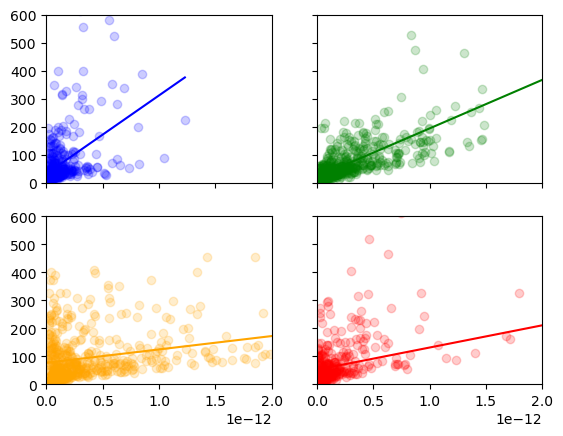

In [76]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])



for seas, ax, col in zip(['DJF','MAM','JJA','SON'], axs.flatten(),['blue','green','orange','red']):
    print(seas)
    _dss = _ds.where(_ds['season']==seas)
    _dss = _dss.to_dataframe().dropna()
    ax.scatter(x=_dss['BC_AI'], y=_dss['N50'],c= col, alpha = 0.2)
    z = np.polyfit(_dss['BC_AI'], _dss['N50'], 1)
    p = np.poly1d(z)
    x= np.linspace(_dss['BC_AI'].min(), _dss['BC_AI'].max())
    ax.plot( x, p(x), c = col, )
    print(p)
    ax.set_ylim ([0,600])
    ax.set_xlim ([0,0.000000000002])
    #ax.set_yscale ('log')
    #ax.set_xscale ('log')
    
    #Calculating R-Squared
    x = np.array([_dss['BC_AI']]).reshape((-1, 1))
    model = LinearRegression().fit (x, _dss['N50'])
    r_sq = model.score(x, _dss['N50'])
    print(f"coefficient of determination: {r_sq}")

DJF
 
2.8e+14 x + 31.14
coefficient of determination: 0.21496443230146645
MAM
 
1.735e+14 x + 19.71
coefficient of determination: 0.6197450192937048
JJA
 
4.774e+13 x + 76.2
coefficient of determination: 0.1896904955643106
SON
 
7.942e+13 x + 51.26
coefficient of determination: 0.5406030757713447


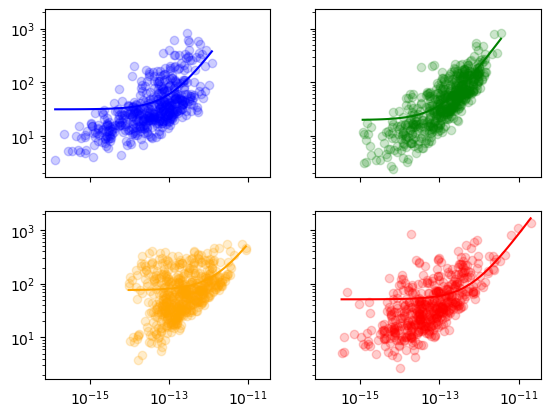

In [77]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])



for seas, ax, col in zip(['DJF','MAM','JJA','SON'], axs.flatten(),['blue','green','orange','red']):
    print(seas)
    _dss = _ds.where(_ds['season']==seas)
    _dss = _dss.to_dataframe().dropna()
    ax.scatter(x=_dss['BC_AI'], y=_dss['N50'],c= col, alpha = 0.2)
    z = np.polyfit(_dss['BC_AI'], _dss['N50'], 1)
    p = np.poly1d(z)
    x= np.logspace(np.log10(_dss['BC_AI'].min()), np.log10(_dss['BC_AI'].max()))
    ax.plot( x, p(x), c = col, )
    print(p)
    #ax.set_ylim ([0,600])
    #ax.set_xlim ([0,0.000000000002])
    ax.set_yscale ('log')
    ax.set_xscale ('log')
    
    #Calculating R-Squared
    x = np.array([_dss['BC_AI']]).reshape((-1, 1))
    model = LinearRegression().fit (x, _dss['N50'])
    r_sq = model.score(x, _dss['N50'])
    print(f"coefficient of determination: {r_sq}")

DJF
 
1.346e+14 x + 13.45
coefficient of determination: 0.18764148871048425
MAM
 
3.669e+13 x + 7.406
coefficient of determination: 0.4755452376688263
JJA
 
2.205e+13 x + 18.29
coefficient of determination: 0.3962897674690533
SON
 
2.685e+13 x + 24.07
coefficient of determination: 0.3718630766508134


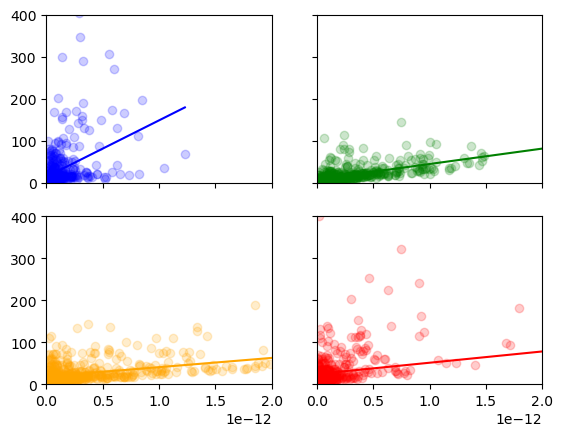

In [78]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])



for seas, ax, col in zip(['DJF','MAM','JJA','SON'], axs.flatten(),['blue','green','orange','red']):
    print(seas)
    _dss = _ds.where(_ds['season']==seas)
    _dss = _dss.to_dataframe().dropna()
    ax.scatter(x=_dss['BC_AI'], y=_dss['N100'],c= col, alpha = 0.2)
    z = np.polyfit(_dss['BC_AI'], _dss['N100'], 1)
    p = np.poly1d(z)
    x= np.linspace(_dss['BC_AI'].min(), _dss['BC_AI'].max())
    ax.plot( x, p(x), c = col, )
    print(p)
    ax.set_ylim ([0,400])
    ax.set_xlim ([0,0.000000000002])
    #ax.set_yscale ('log')
    #ax.set_xscale ('log')
    
    #Calculating R-Squared
    x = np.array([_dss['BC_AI']]).reshape((-1, 1))
    model = LinearRegression().fit (x, _dss['N100'])
    r_sq = model.score(x, _dss['N100'])
    print(f"coefficient of determination: {r_sq}")

## R-squared values for the sason and measurement level.

In [79]:
ds_daily

<xarray.Dataset>
Dimensions:   (location: 5, time: 2193, lev: 32)
Coordinates:
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * location  (location) object 'Puijo' 'Zeppelin' ... 'Pallas' 'Jungfraujoch'
  * time      (time) datetime64[ns] 2012-01-02 2012-01-03 ... 2018-01-02
Data variables: (12/14)
    SO4_A1    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_A2    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_AC    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_NA    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_PR    (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SO4_tot   (location, time, lev) float64 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    ...        ...
    N200      (location, time, lev) float64 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    N50       (location, time, lev) float64 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SS_A1     (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SS_A2     (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    SS_A3     (location, time, lev) float32 dask.array<chunksize=(5, 2193, 32), meta=np.ndarray>
    season    (time) <U3 'DJF' 'DJF' 'DJF' 'DJF' ... 'DJF' 'DJF' 'DJF' 'DJF'

In [80]:
Surface_daily = ds_daily.sel(location = 'Zeppelin').isel(lev=-1)
Surface_daily = Surface_daily.load()

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


 
293.8 x + 34.36
coefficient of determination: 0.3101148473119072


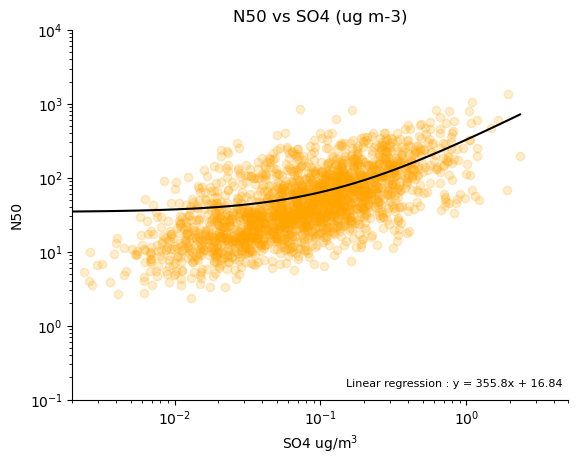

In [81]:
f, ax = plt.subplots()
#ax.scatter(x=ds['SO4'], y=ds['N50'])
#ax.set_ylim ([0.1,1000])

_dss = Surface_daily[['SO4_tot','N50']].dropna('time')
ax.scatter(x=_dss['SO4_tot'], y=_dss['N50'],c='orange',alpha = 0.2)

#Linear regression
z = np.polyfit(_dss['SO4_tot'], _dss['N50'], 1)
p = np.poly1d(z)
x= np.logspace(np.log10(_dss['SO4_tot'].min()), np.log10(_dss['SO4_tot'].max()))
print(p)
ax.plot( x, p(x), c = 'black', )

ax.text(0.15, 0.15, 'Linear regression : y = 355.8x + 16.84' ,fontsize=8)
ax.set_ylim(0.1,10000)
ax.set_xlim(0.002,5)
ax.set_yscale ('log')
ax.set_xscale ('log')
plt.xlabel('SO4 ug/m$^3$')
plt.ylabel('N50')
ax.set_title(f'N50 vs SO4 (ug m-3)')
sns.despine()

#Calculating R-Squared
x = np.array([_dss['SO4_tot']]).reshape((-1, 1))
model = LinearRegression().fit (x, _dss['N50'])
r_sq = model.score(x, _dss['N50'])
print(f"coefficient of determination: {r_sq}")

In [82]:
x = np.array([_dss['SO4_tot']]).reshape((-1, 1))
x

array([[0.72935632],
       [0.28356094],
       [0.82010962],
       ...,
       [0.18855014],
       [0.02618755],
       [0.03635191]])

In [83]:
_dss['SO4_tot']
_DSS = np.array(_dss['SO4_tot'])
_DSS.reshape(1,-1)
_DSS

array([0.72935632, 0.28356094, 0.82010962, ..., 0.18855014, 0.02618755,
       0.03635191])

 
113.4 x + 10.26
coefficient of determination: 0.3083837972706962


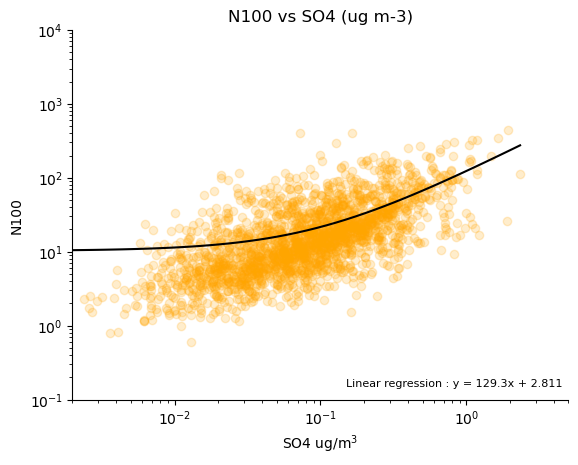

In [84]:
f, ax = plt.subplots()
#ax.scatter(x=ds['SO4'], y=ds['N50'])
#ax.set_ylim ([0.1,1000])

_dss = Surface_daily[['SO4_tot','N100']].dropna('time')
ax.scatter(x=_dss['SO4_tot'], y=_dss['N100'], c='orange', alpha = 0.2 )

#Linear regression
z = np.polyfit(_dss['SO4_tot'], _dss['N100'], 1)
p = np.poly1d(z)
x= np.logspace(np.log10(_dss['SO4_tot'].min()), np.log10(_dss['SO4_tot'].max()))
print(p)
ax.plot( x, p(x), c = 'black', )

ax.text(0.15, 0.15, 'Linear regression : y = 129.3x + 2.811' ,fontsize=8)
ax.set_ylim(0.1,10000)
ax.set_xlim(0.002,5)
ax.set_yscale ('log')
ax.set_xscale ('log')
plt.xlabel('SO4 ug/m$^3$')
plt.ylabel('N100')
ax.set_title(f'N100 vs SO4 (ug m-3)')
sns.despine(f)

#Calculating R-Squared
x = np.array([_dss['SO4_tot']]).reshape((-1, 1))
_y = np.array(_dss['N100'])
#_y.reshape((-1,1))
model = LinearRegression()
model.fit (x, _dss['N100'])
#model = LinearRegression().fit(_DSS, _y)
r_sq = model.score(x, _y)
print(f"coefficient of determination: {r_sq}")


In [85]:
winter_daily = ds_daily.sel(location='Zeppelin').where(ds_daily['season']== 'DJF')
winter_daily = winter_daily.load()

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


In [86]:
spring_daily = ds_daily.sel(location='Zeppelin').where(ds_daily['season']== 'MAM')
spring_daily = spring_daily.load()

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


In [87]:
summer_daily = ds_daily.sel(location='Zeppelin').where(ds_daily['season']== 'JJA')
summer_daily = summer_daily.load()

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


In [88]:
fall_daily = ds_daily.sel(location='Zeppelin').where(ds_daily['season']== 'SON')
fall_daily = fall_daily.load()

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


In [89]:
import seaborn as sns

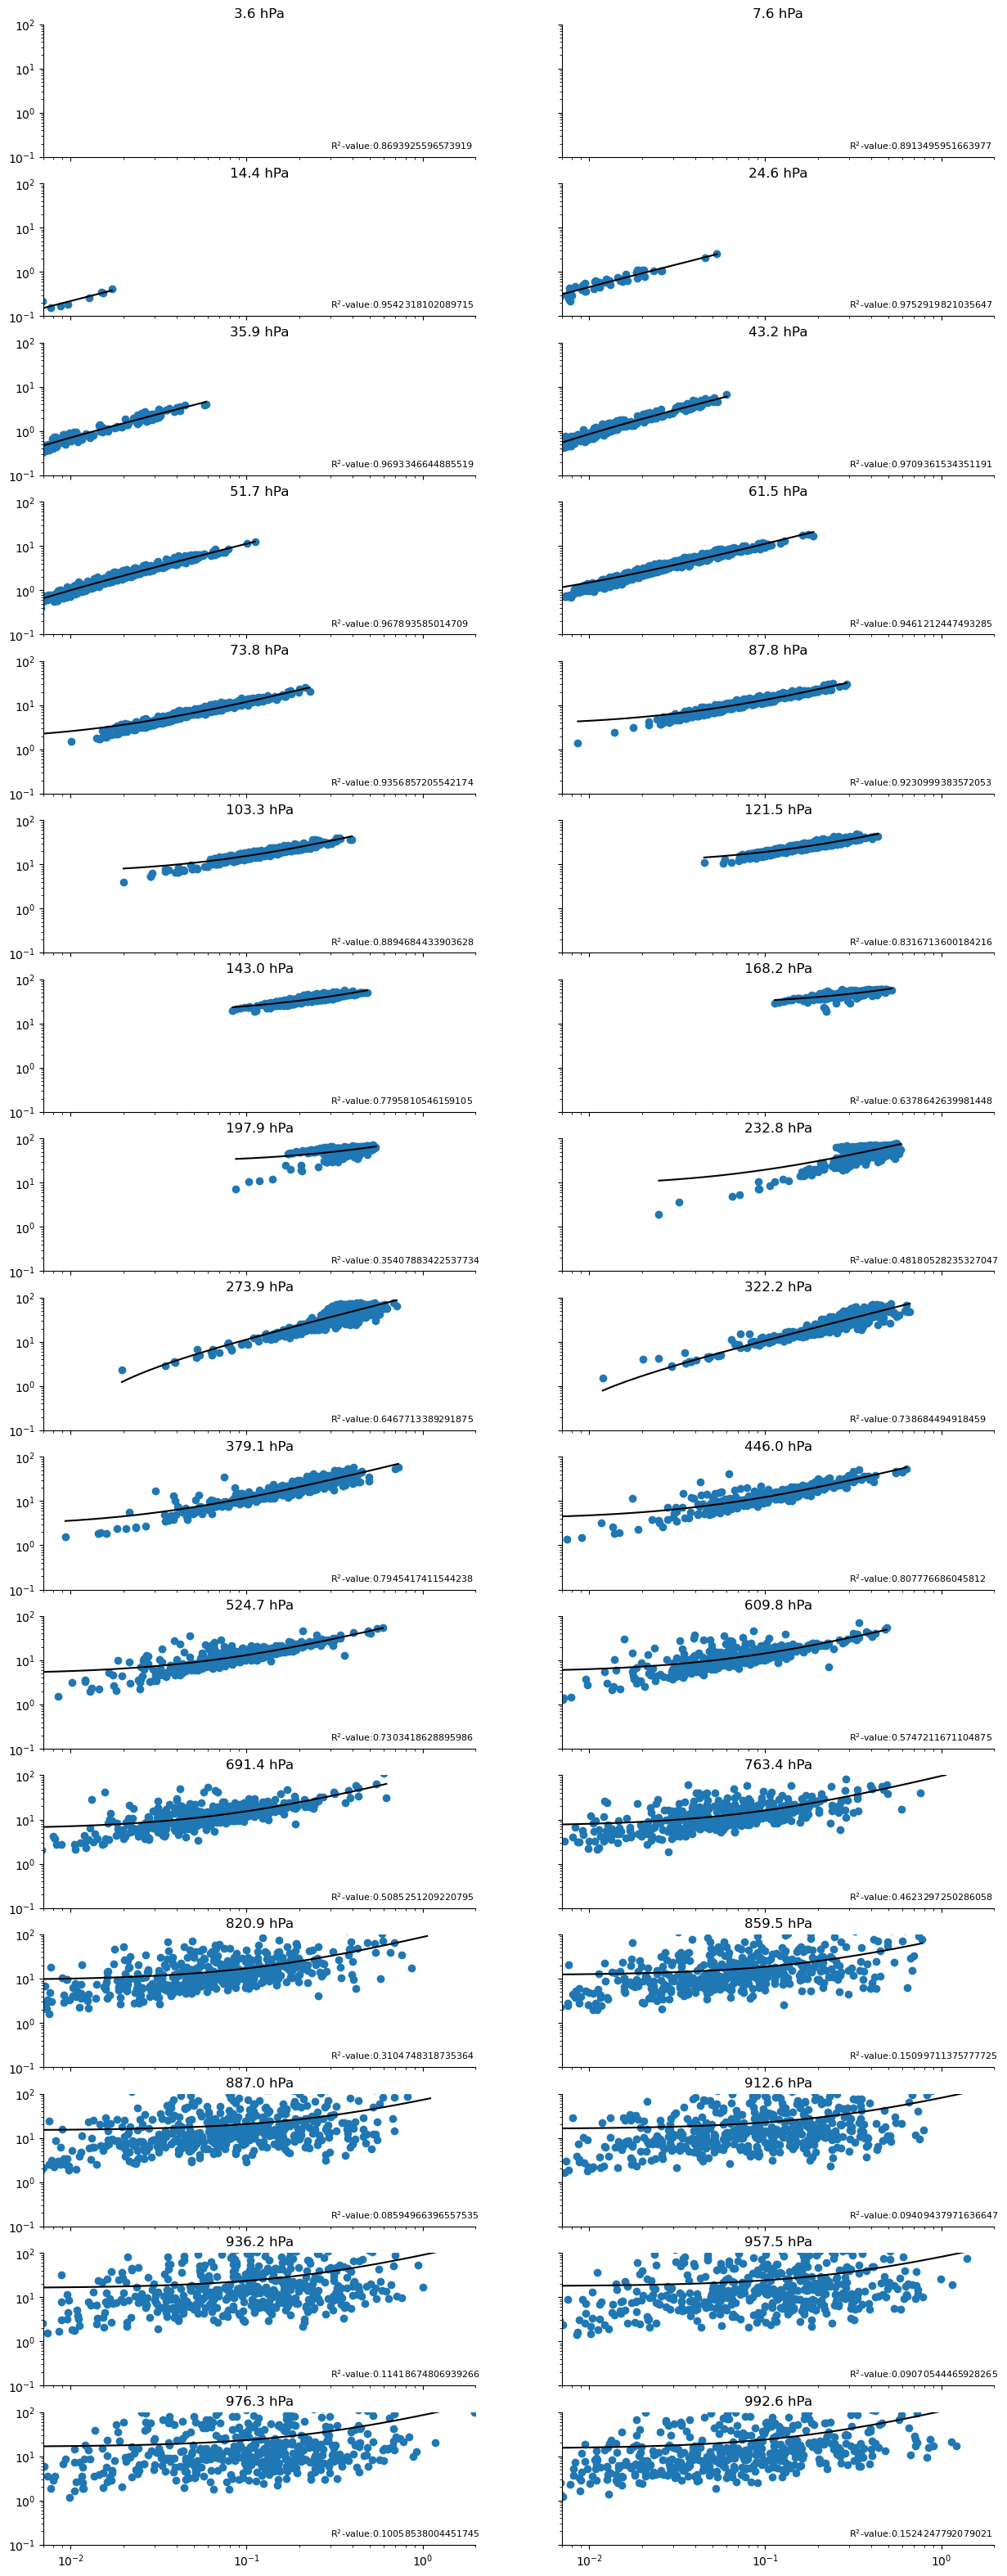

In [90]:
fig, axs = plt.subplots(16,2, sharex=True, sharey=True, figsize = [15,40])

#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])

for lev, ax in zip(winter_daily['lev'], axs.flatten()):
    #print(lev)
    _dss = winter_daily.where(winter_daily['lev']==lev)
    _dss = _dss.to_dataframe().dropna()
    ax.scatter(x=_dss['SO4_tot'], y=_dss['N100'] )
    z = np.polyfit(_dss['SO4_tot'], _dss['N100'], 1)
    p = np.poly1d(z)
    x= np.logspace(np.log10(_dss['SO4_tot'].min()), np.log10(_dss['SO4_tot'].max()))
    ax.plot( x, p(x), c = 'black', )
    #dpi = 100
    #print(p)
    ax.set_ylim ([0.1,100])
    ax.set_xlim ([0.007,2])
    ax.set_yscale ('log')
    ax.set_xscale ('log')
    ax.set_title(f'{lev.values:.1f} hPa')
    
    #Calculating R-Squared
    x = np.array([_dss['SO4_tot']]).reshape((-1, 1))
    model = LinearRegression().fit (x, _dss['N100'])
    r_sq = model.score(x, _dss['N100'])
    ax.text(0.3, 0.15, f"R$^2$-value:{r_sq}"  ,fontsize=8)
    #ax.text(0.3, 0.15, f"R$^2$-value:{r_sq}0.3f"  ,fontsize=8)
    
sns.despine(fig)

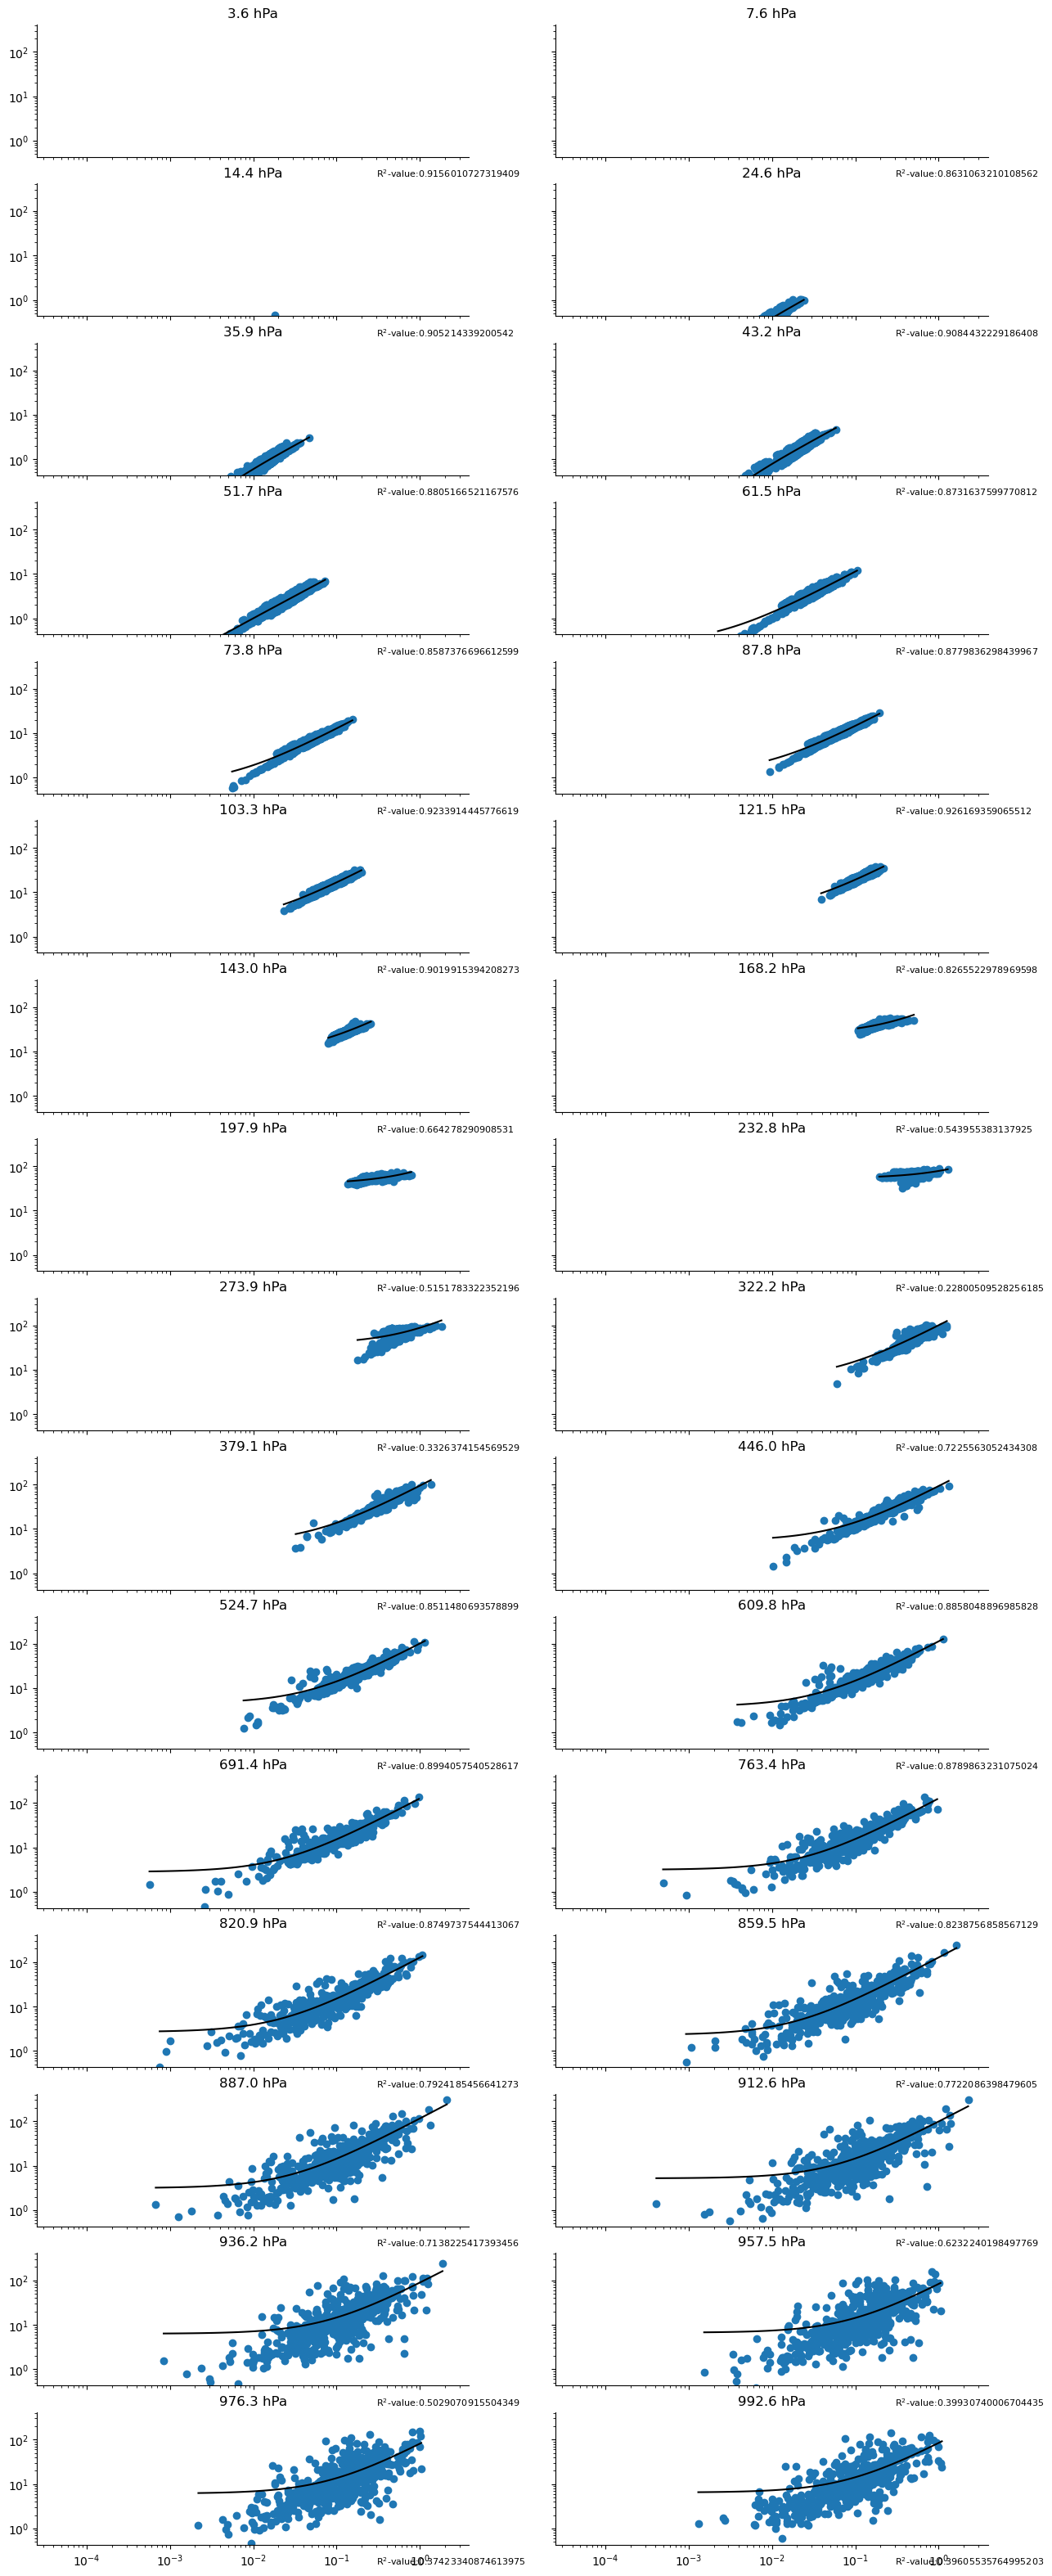

In [92]:
fig, axs = plt.subplots(16,2, figsize = [15,40], sharex=True, sharey=True)

#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])

for lev, ax in zip(spring_daily['lev'], axs.flatten()):
    #print(lev)
    _dss = spring_daily.where(spring_daily['lev']==lev)
    _dss = _dss.to_dataframe().dropna()
    ax.scatter(x=_dss['SO4_tot'], y=_dss['N100'] )
    z = np.polyfit(_dss['SO4_tot'], _dss['N100'], 1)
    p = np.poly1d(z)
    x= np.logspace(np.log10(_dss['SO4_tot'].min()), np.log10(_dss['SO4_tot'].max()))
    ax.plot( x, p(x), c = 'black', )
    #print(p)
    #ax.set_ylim ([7,100])
    #ax.set_xlim ([0.007,0.2])
    ax.set_yscale ('log')
    ax.set_xscale ('log')
    ax.set_title(f'{lev.values:.1f} hPa')
    
    #Calculating R-Squared
    x = np.array([_dss['SO4_tot']]).reshape((-1, 1))
    model = LinearRegression().fit (x, _dss['N100'])
    r_sq = model.score(x, _dss['N100'])
    ax.text(0.3, 0.15, f"R$^2$-value:{r_sq}"  ,fontsize=8)
    #ax.text(0.3, 0.15, f"R$^2$-value:{r_sq}0.3f"  ,fontsize=8)
    
sns.despine(fig)

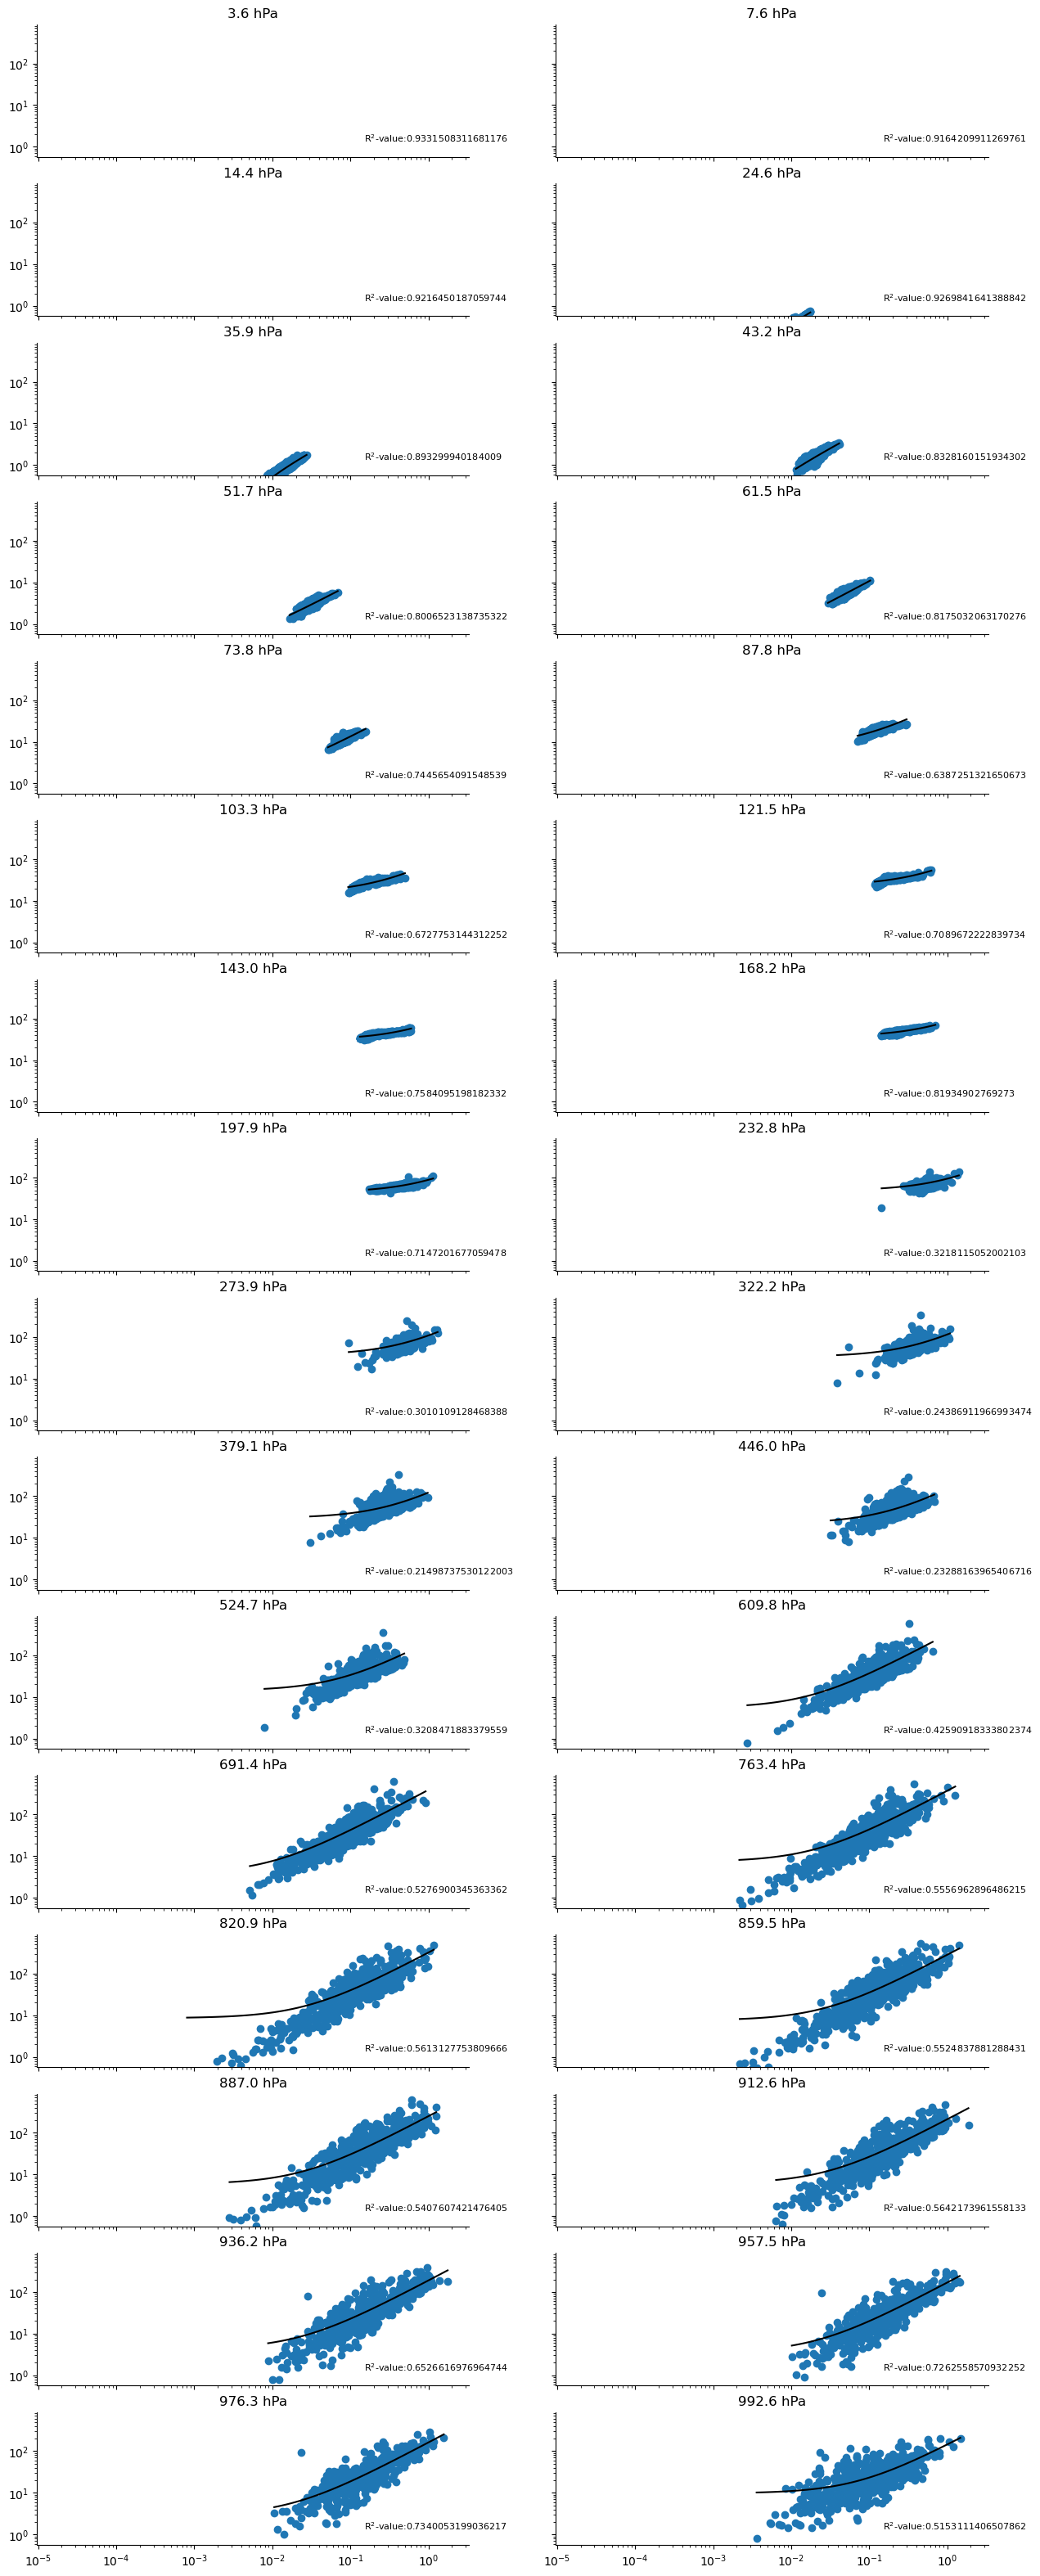

In [93]:
fig, axs = plt.subplots(16,2, figsize = [15,40], sharex=True, sharey=True)

#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])

for lev, ax in zip(summer_daily['lev'], axs.flatten()):
    #print(lev)
    _dss = summer_daily.where(summer_daily['lev']==lev)
    _dss = _dss.to_dataframe().dropna()
    ax.scatter(x=_dss['SO4_tot'], y=_dss['N100'] )
    z = np.polyfit(_dss['SO4_tot'], _dss['N100'], 1)
    p = np.poly1d(z)
    x= np.logspace(np.log10(_dss['SO4_tot'].min()), np.log10(_dss['SO4_tot'].max()))
    ax.plot( x, p(x), c = 'black', )
    #print(p)
    #ax.set_ylim ([7,100])
    #ax.set_xlim ([0.007,0.2])
    ax.set_yscale ('log')
    ax.set_xscale ('log')
    ax.set_title(f'{lev.values:.1f} hPa')
    
    #Calculating R-Squared
    x = np.array([_dss['SO4_tot']]).reshape((-1, 1))
    model = LinearRegression().fit (x, _dss['N100'])
    r_sq = model.score(x, _dss['N100'])
    ax.text(0.15, 1.3, f"R$^2$-value:{r_sq}"  ,fontsize=8)
    #ax.text(0.3, 0.15, f"R$^2$-value:{r_sq}0.3f"  ,fontsize=8)
    
sns.despine(fig)

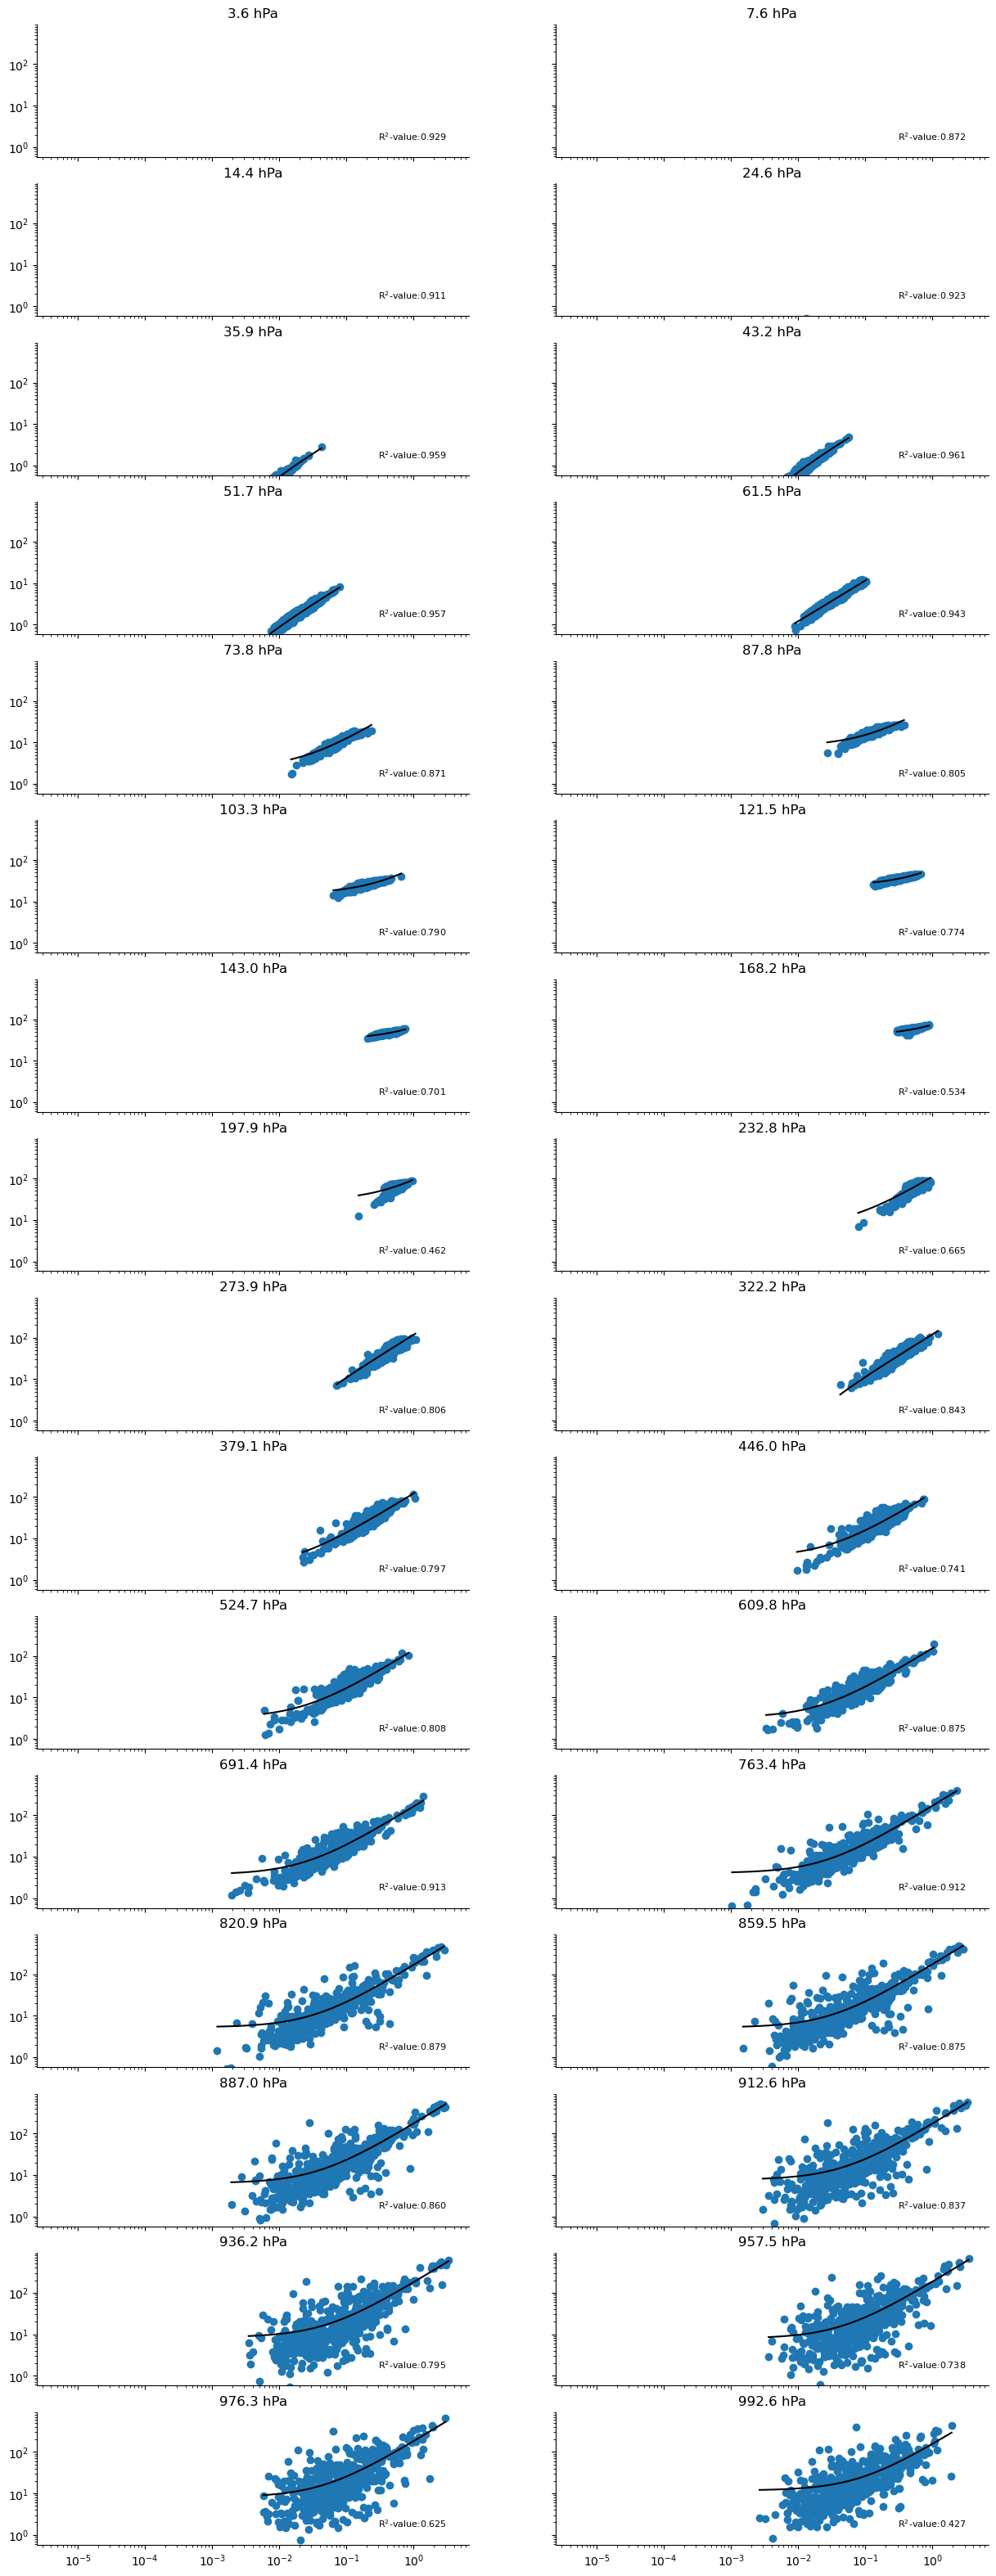

In [94]:
fig, axs = plt.subplots(16,2, figsize = [15,40], sharex=True, sharey=True)

#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])

for lev, ax in zip(fall_daily['lev'], axs.flatten()):
    #print(lev)
    _dss = fall_daily.where(fall_daily['lev']==lev)
    _dss = _dss.to_dataframe().dropna()
    ax.scatter(x=_dss['SO4_tot'], y=_dss['N100'] )
    z = np.polyfit(_dss['SO4_tot'], _dss['N100'], 1)
    p = np.poly1d(z)
    x= np.logspace(np.log10(_dss['SO4_tot'].min()), np.log10(_dss['SO4_tot'].max()))
    ax.plot( x, p(x), c = 'black', )
    #print(p)
    #ax.set_ylim ([7,100])
    #ax.set_xlim ([0.007,0.2])
    ax.set_yscale ('log')
    ax.set_xscale ('log')
    ax.set_title(f'{lev.values:.1f} hPa')
    
    #Calculating R-Squared
    x = np.array([_dss['SO4_tot']]).reshape((-1, 1))
    model = LinearRegression().fit (x, _dss['N100'])
    r_sq = model.score(x, _dss['N100'])
    ax.text(0.3, 1.5, f"R$^2$-value:{r_sq:.3f}"  ,fontsize=8)
    #ax.text(0.3, 0.15, f"R$^2$-value:{r_sq}0.3f"  ,fontsize=8)
    
sns.despine(fig)

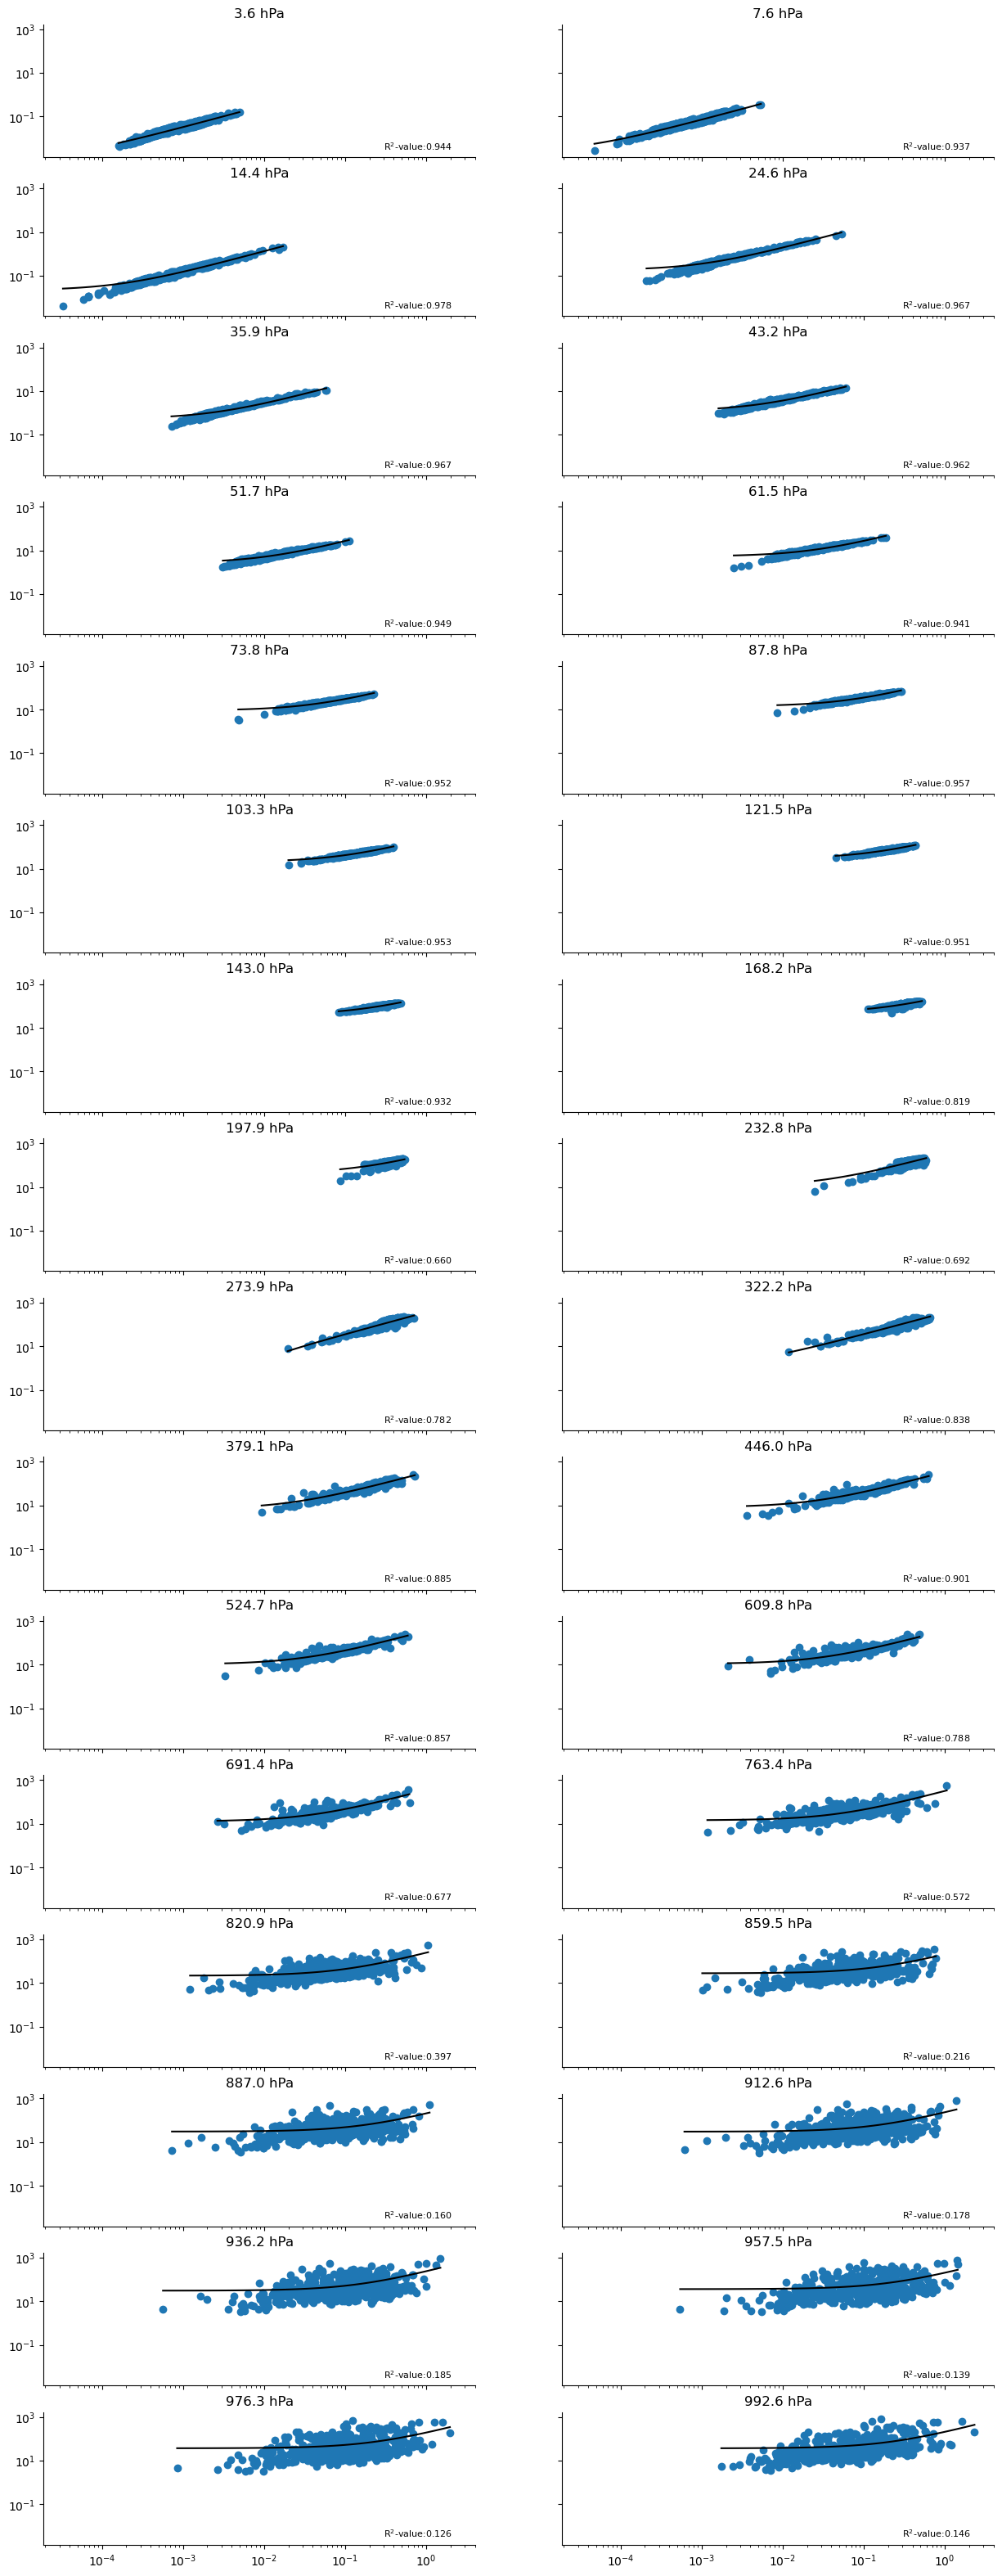

In [95]:
fig, axs = plt.subplots(16,2, figsize = [15,40], sharex=True, sharey=True)

#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])

for lev, ax in zip(winter_daily['lev'], axs.flatten()):
    #print(lev)
    _dss = winter_daily.where(winter_daily['lev']==lev)
    _dss = _dss.to_dataframe().dropna()
    ax.scatter(x=_dss['SO4_tot'], y=_dss['N50'] )
    z = np.polyfit(_dss['SO4_tot'], _dss['N50'], 1)
    p = np.poly1d(z)
    x= np.logspace(np.log10(_dss['SO4_tot'].min()), np.log10(_dss['SO4_tot'].max()))
    ax.plot( x, p(x), c = 'black', )
    #print(p)
    #ax.set_ylim ([7,100])
    #ax.set_xlim ([0.007,0.2])
    ax.set_yscale ('log')
    ax.set_xscale ('log')
    ax.set_title(f'{lev.values:.1f} hPa')
    
    #Calculating R-Squared
    x = np.array([_dss['SO4_tot']]).reshape((-1, 1))
    model = LinearRegression().fit (x, _dss['N50'])
    r_sq = model.score(x, _dss['N50'])
    ax.text(0.3, 0.003, f"R$^2$-value:{r_sq:.3f}"  ,fontsize=8)
    #ax.text(0.3, 0.15, f"R$^2$-value:{r_sq}0.3f"  ,fontsize=8)
    
sns.despine(fig)

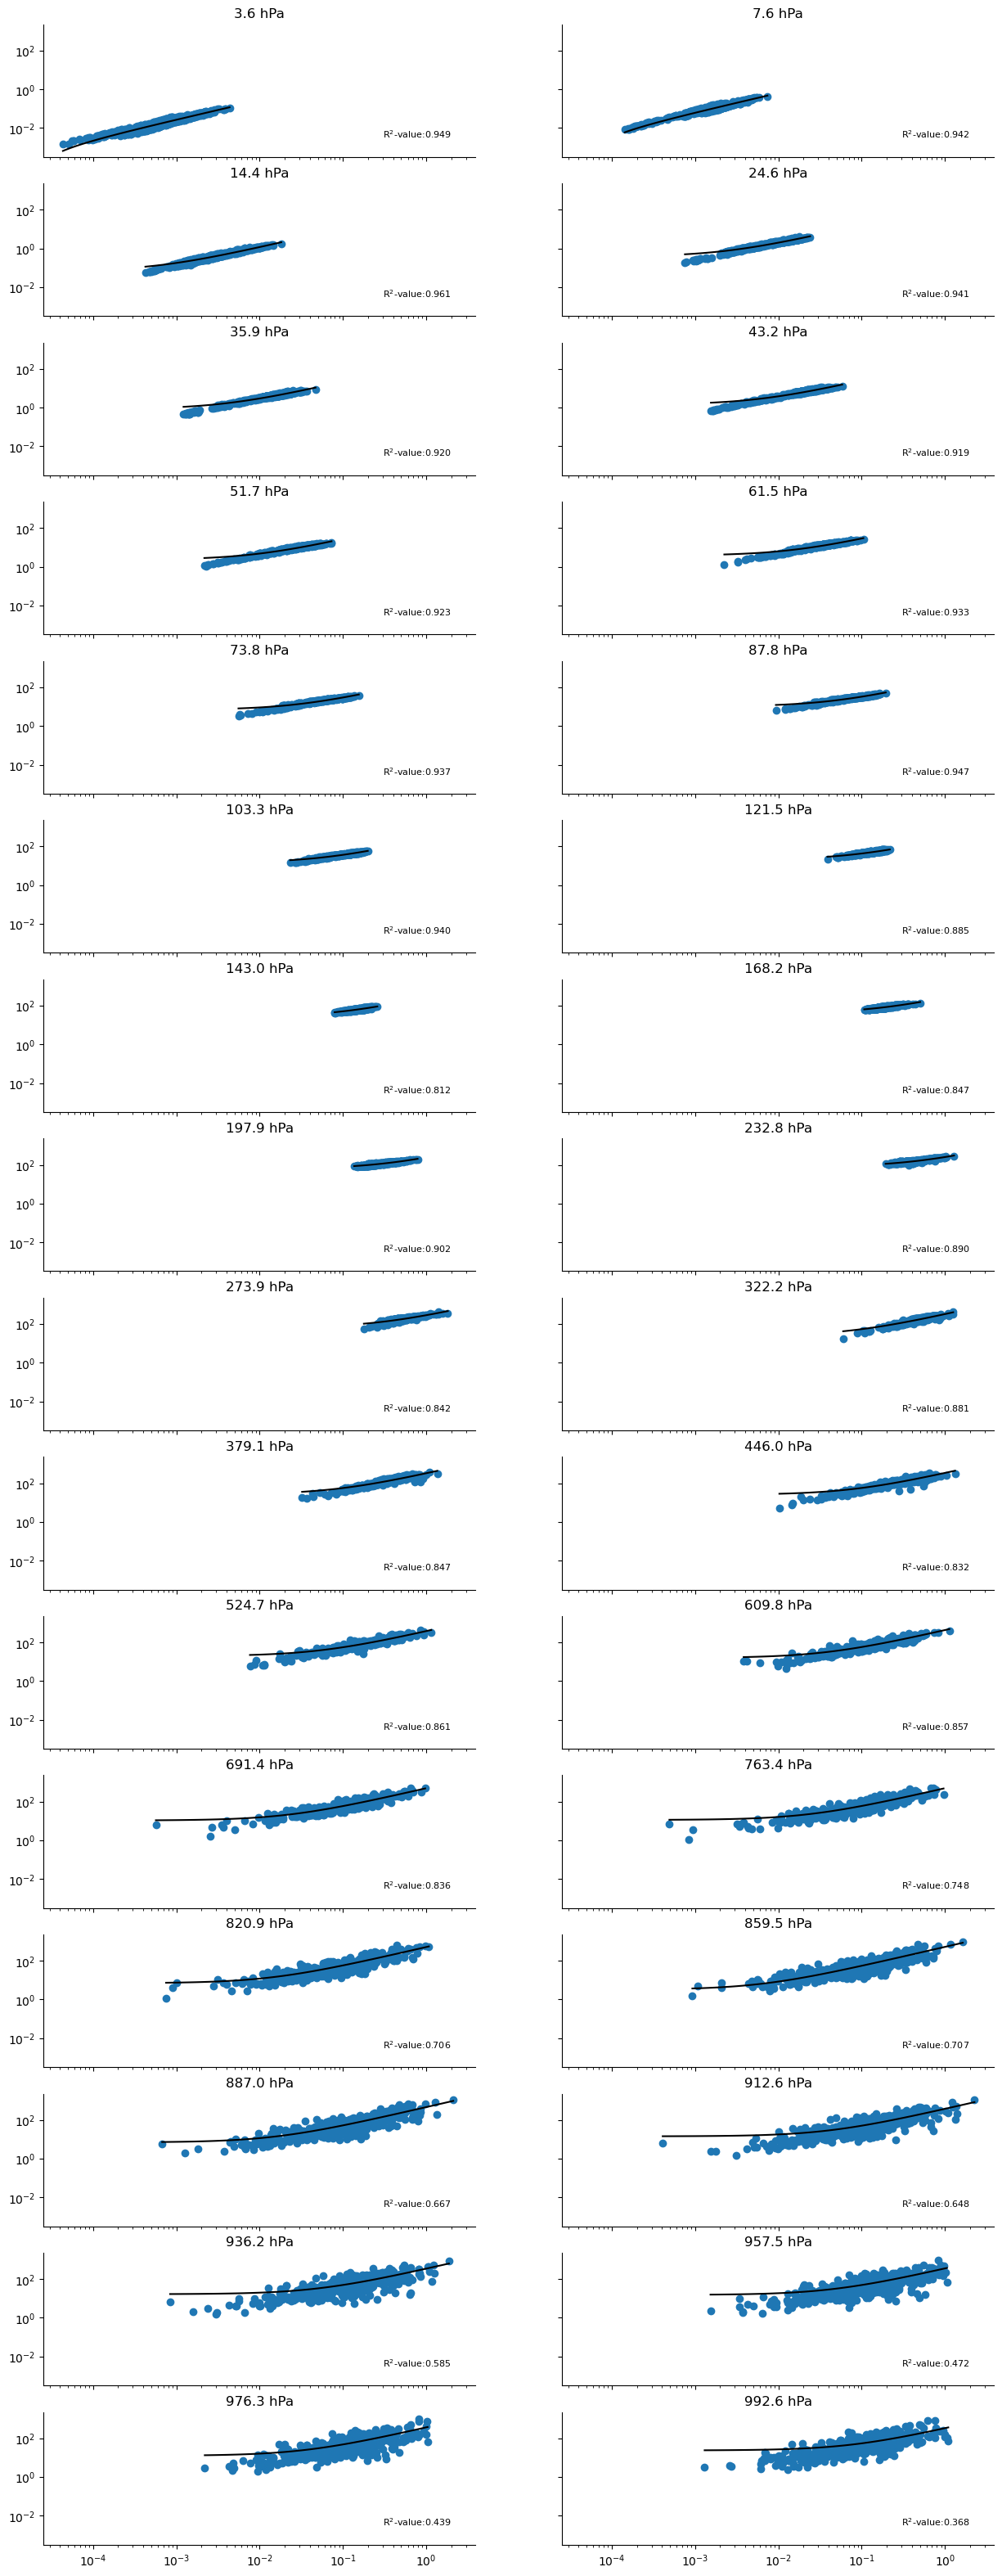

In [96]:
fig, axs = plt.subplots(16,2, figsize = [15,40], sharex=True, sharey=True)

#ax.set_ylim ([0,750])
#ax.set_xlim ([0,1.2])

for lev, ax in zip(spring_daily['lev'], axs.flatten()):
    #print(lev)
    _dss = spring_daily.where(spring_daily['lev']==lev)
    _dss = _dss.to_dataframe().dropna()
    ax.scatter(x=_dss['SO4_tot'], y=_dss['N50'] )
    z = np.polyfit(_dss['SO4_tot'], _dss['N50'], 1)
    p = np.poly1d(z)
    x= np.logspace(np.log10(_dss['SO4_tot'].min()), np.log10(_dss['SO4_tot'].max()))
    ax.plot( x, p(x), c = 'black', )
    #print(p)
    #ax.set_ylim ([7,100])
    #ax.set_xlim ([0.007,0.2])
    ax.set_yscale ('log')
    ax.set_xscale ('log')
    ax.set_title(f'{lev.values:.1f} hPa')
    
    #Calculating R-Squared
    x = np.array([_dss['SO4_tot']]).reshape((-1, 1))
    model = LinearRegression().fit (x, _dss['N50'])
    r_sq = model.score(x, _dss['N50'])
    ax.text(0.3, 0.003, f"R$^2$-value:{r_sq:.3f}"  ,fontsize=8)
    #ax.text(0.3, 0.15, f"R$^2$-value:{r_sq}0.3f"  ,fontsize=8)
    
sns.despine(fig)

***

## Importing the observation data

In [97]:
!pip install threddsclient
import threddsclient
import xarray as xr
opendap_urls = 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.19930101070000.20210421112338.filter_3pack..aerosol.18y.1d.NO01L_f3p_d_0042.NO01L_IC.lev2.nc'

In [98]:
dsmf_SUL = xr.open_dataset(opendap_urls)
dsmf_SUL

<xarray.Dataset>
Dimensions:                                      (time: 6574, tbnds: 2,
                                                  metadata_time: 18,
                                                  nitrate_ug_per_m3_qc_flags: 2,
                                                  chloride_qc_flags: 1,
                                                  sulphate_corrected_ug_per_m3_qc_flags: 1,
                                                  sulphate_total_ug_S_per_m3_qc_flags: 1,
                                                  ...
                                                  nitrate_ug_N_per_m3_qc_flags: 2,
                                                  sulphate_corrected_ug_S_per_m3_qc_flags: 1,
                                                  ammonium_ug_per_m3_qc_flags: 2,
                                                  potassium_qc_flags: 1,
                                                  calcium_qc_flags: 1,
                                                  magnesium_qc_flags: 1)
Coordinates:
  * time                                         (time) datetime64[ns] 1993-0...
  * metadata_time                                (metadata_time) datetime64[ns] ...
Dimensions without coordinates: tbnds, nitrate_ug_per_m3_qc_flags,
                                chloride_qc_flags,
                                sulphate_corrected_ug_per_m3_qc_flags,
                                sulphate_total_ug_S_per_m3_qc_flags,
                                sodium_qc_flags, ammonium_ug_N_per_m3_qc_flags,
                                sulphate_total_ug_per_m3_qc_flags,
                                nitrate_ug_N_per_m3_qc_flags,
                                sulphate_corrected_ug_S_per_m3_qc_flags,
                                ammonium_ug_per_m3_qc_flags,
                                potassium_qc_flags, calcium_qc_flags,
                                magnesium_qc_flags
Data variables: (12/41)
    time_bnds                                    (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                           (metadata_time, tbnds) datetime64[ns] ...
    nitrate_ug_per_m3_qc                         (nitrate_ug_per_m3_qc_flags, time) float64 ...
    chloride_qc                                  (chloride_qc_flags, time) float64 ...
    ammonium_ug_per_m3                           (time) float64 ...
    sulphate_corrected_ug_S_per_m3               (time) float64 ...
    ...                                           ...
    ammonium_ug_per_m3_qc                        (ammonium_ug_per_m3_qc_flags, time) float64 ...
    calcium                                      (time) float64 ...
    magnesium                                    (time) float64 ...
    potassium_qc                                 (potassium_qc_flags, time) float64 ...
    calcium_qc                                   (calcium_qc_flags, time) float64 ...
    magnesium_qc                                 (magnesium_qc_flags, time) float64 ...
Attributes: (12/92)
    Conventions:                       CF-1.8, ACDD-1.3
    featureType:                       timeSeries
    title:                             Ground based in situ observations of f...
    keywords:                          NO0042G, mass_concentration_of_chlorid...
    id:                                NO0042G.19930101070000.20210421112338....
    naming_authority:                  EBAS
    ...                                ...
    geospatial_lat_units:              degrees_north
    geospatial_lon_units:              degrees_east
    comment:                           {\n    "Data definition": "EBAS_1.1", ...
    standard_name_vocabulary:          CF-1.7, ACDD-1.3
    history:                           None
    creator_url:                       ebas.nilu.no

In [99]:
opendap_urls = 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20110101070000.20210420142507.filter_3pack...1y.1d.NO01L_f3p_d_0042.NO01L_IC.lev2.nc'

In [100]:
dsmf_S2011 = xr.open_dataset(opendap_urls)
dsmf_S2011

<xarray.Dataset>
Dimensions:                                   (time: 365, tbnds: 2,
                                               metadata_time: 1,
                                               chloride_qc_flags: 1,
                                               nitrate_ug_per_m3_qc_flags: 1,
                                               nitric_acid_qc_flags: 1,
                                               sulphate_total_ug_S_per_m3_qc_flags: 1,
                                               ...
                                               sum_nitric_acid_and_nitrate_qc_flags: 1,
                                               ammonium_ug_per_m3_qc_flags: 1,
                                               ammonia_qc_flags: 1,
                                               potassium_qc_flags: 1,
                                               calcium_qc_flags: 1,
                                               magnesium_qc_flags: 1)
Coordinates:
  * time                                      (time) datetime64[ns] 2011-01-0...
  * metadata_time                             (metadata_time) datetime64[ns] ...
Dimensions without coordinates: tbnds, chloride_qc_flags,
                                nitrate_ug_per_m3_qc_flags,
                                nitric_acid_qc_flags,
                                sulphate_total_ug_S_per_m3_qc_flags,
                                sodium_qc_flags, ammonium_ug_N_per_m3_qc_flags,
                                sulphate_total_ug_per_m3_qc_flags,
                                nitrate_ug_N_per_m3_qc_flags,
                                sum_ammonia_and_ammonium_qc_flags,
                                sum_nitric_acid_and_nitrate_qc_flags,
                                ammonium_ug_per_m3_qc_flags, ammonia_qc_flags,
                                potassium_qc_flags, calcium_qc_flags,
                                magnesium_qc_flags
Data variables: (12/47)
    time_bnds                                 (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                        (metadata_time, tbnds) datetime64[ns] ...
    chloride_qc                               (chloride_qc_flags, time) float64 ...
    nitrate_ug_per_m3_qc                      (nitrate_ug_per_m3_qc_flags, time) float64 ...
    ammonium_ug_per_m3                        (time) float64 ...
    sum_nitric_acid_and_nitrate_ebasmetadata  (metadata_time) |S64 ...
    ...                                        ...
    ammonia_qc                                (ammonia_qc_flags, time) float64 ...
    calcium                                   (time) float64 ...
    magnesium                                 (time) float64 ...
    potassium_qc                              (potassium_qc_flags, time) float64 ...
    calcium_qc                                (calcium_qc_flags, time) float64 ...
    magnesium_qc                              (magnesium_qc_flags, time) float64 ...
Attributes: (12/90)
    Conventions:                       CF-1.8, ACDD-1.3
    featureType:                       timeSeries
    title:                             Ground based in situ observations of f...
    keywords:                          mass_concentration_of_chloride_in_dry_...
    id:                                NO0042G.20110101070000.20210420142507....
    naming_authority:                  EBAS
    ...                                ...
    geospatial_lat_units:              degrees_north
    geospatial_lon_units:              degrees_east
    comment:                           {\n    "Data definition": "EBAS_1.1", ...
    standard_name_vocabulary:          CF-1.7, ACDD-1.3
    history:                           None
    creator_url:                       ebas.nilu.no

In [101]:
opendap_urls = 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20120101070000.20210421112338.filter_3pack...6y.1d.NO01L_f3p_d_0042.NO01L_IC.lev2.nc'

In [102]:
dsmf_S2012 = xr.open_dataset(opendap_urls)
dsmf_S2012

<xarray.Dataset>
Dimensions:                                      (time: 2192, tbnds: 2,
                                                  metadata_time: 6,
                                                  chloride_qc_flags: 1,
                                                  nitrate_ug_per_m3_qc_flags: 1,
                                                  sulphate_corrected_ug_per_m3_qc_flags: 1,
                                                  nitric_acid_qc_flags: 1,
                                                  ...
                                                  sum_nitric_acid_and_nitrate_qc_flags: 1,
                                                  ammonium_ug_per_m3_qc_flags: 1,
                                                  ammonia_qc_flags: 1,
                                                  potassium_qc_flags: 1,
                                                  calcium_qc_flags: 1,
                                                  magnesium_qc_flags: 1)
Coordinates:
  * time                                         (time) datetime64[ns] 2012-0...
  * metadata_time                                (metadata_time) datetime64[ns] ...
Dimensions without coordinates: tbnds, chloride_qc_flags,
                                nitrate_ug_per_m3_qc_flags,
                                sulphate_corrected_ug_per_m3_qc_flags,
                                nitric_acid_qc_flags,
                                sulphate_total_ug_S_per_m3_qc_flags,
                                sodium_qc_flags, ammonium_ug_N_per_m3_qc_flags,
                                ...
                                sulphate_corrected_ug_S_per_m3_qc_flags,
                                sum_ammonia_and_ammonium_qc_flags,
                                sum_nitric_acid_and_nitrate_qc_flags,
                                ammonium_ug_per_m3_qc_flags, ammonia_qc_flags,
                                potassium_qc_flags, calcium_qc_flags,
                                magnesium_qc_flags
Data variables: (12/53)
    time_bnds                                    (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                           (metadata_time, tbnds) datetime64[ns] ...
    chloride_qc                                  (chloride_qc_flags, time) float64 ...
    nitrate_ug_per_m3_qc                         (nitrate_ug_per_m3_qc_flags, time) float64 ...
    ammonium_ug_per_m3                           (time) float64 ...
    sulphate_corrected_ug_S_per_m3               (time) float64 ...
    ...                                           ...
    ammonia_qc                                   (ammonia_qc_flags, time) float64 ...
    calcium                                      (time) float64 ...
    magnesium                                    (time) float64 ...
    potassium_qc                                 (potassium_qc_flags, time) float64 ...
    calcium_qc                                   (calcium_qc_flags, time) float64 ...
    magnesium_qc                                 (magnesium_qc_flags, time) float64 ...
Attributes: (12/90)
    Conventions:                       CF-1.8, ACDD-1.3
    featureType:                       timeSeries
    title:                             Ground based in situ observations of f...
    keywords:                          mass_concentration_of_chloride_in_dry_...
    id:                                NO0042G.20120101070000.20210421112338....
    naming_authority:                  EBAS
    ...                                ...
    geospatial_lat_units:              degrees_north
    geospatial_lon_units:              degrees_east
    comment:                           {\n    "Data definition": "EBAS_1.1", ...
    standard_name_vocabulary:          CF-1.7, ACDD-1.3
    history:                           None
    creator_url:                       ebas.nilu.no

In [103]:
opendap_urls = 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20180101070000.20220405123416.filter_3pack...4y.1d.NO01L_f3p_d_0042.NO01L_IC.lev2.nc'

In [104]:
dsmf_S2018 = xr.open_dataset(opendap_urls)
dsmf_S2018

<xarray.Dataset>
Dimensions:                                      (time: 1461, tbnds: 2,
                                                  metadata_time: 4,
                                                  chloride_qc_flags: 1,
                                                  nitrate_ug_per_m3_qc_flags: 2,
                                                  sulphate_corrected_ug_per_m3_qc_flags: 2,
                                                  nitric_acid_qc_flags: 2,
                                                  ...
                                                  sum_nitric_acid_and_nitrate_qc_flags: 2,
                                                  ammonium_ug_per_m3_qc_flags: 2,
                                                  ammonia_qc_flags: 2,
                                                  potassium_qc_flags: 2,
                                                  calcium_qc_flags: 2,
                                                  magnesium_qc_flags: 2)
Coordinates:
  * time                                         (time) datetime64[ns] 2018-0...
  * metadata_time                                (metadata_time) datetime64[ns] ...
Dimensions without coordinates: tbnds, chloride_qc_flags,
                                nitrate_ug_per_m3_qc_flags,
                                sulphate_corrected_ug_per_m3_qc_flags,
                                nitric_acid_qc_flags,
                                sulphate_total_ug_S_per_m3_qc_flags,
                                sodium_qc_flags, ammonium_ug_N_per_m3_qc_flags,
                                ...
                                sum_ammonia_and_ammonium_qc_flags,
                                sulphur_dioxide_qc_flags,
                                sum_nitric_acid_and_nitrate_qc_flags,
                                ammonium_ug_per_m3_qc_flags, ammonia_qc_flags,
                                potassium_qc_flags, calcium_qc_flags,
                                magnesium_qc_flags
Data variables: (12/56)
    time_bnds                                    (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                           (metadata_time, tbnds) datetime64[ns] ...
    chloride_qc                                  (chloride_qc_flags, time) float64 ...
    nitrate_ug_per_m3_qc                         (nitrate_ug_per_m3_qc_flags, time) float64 ...
    ammonium_ug_per_m3                           (time) float64 ...
    sulphate_corrected_ug_S_per_m3               (time) float64 ...
    ...                                           ...
    ammonia_qc                                   (ammonia_qc_flags, time) float64 ...
    calcium                                      (time) float64 ...
    magnesium                                    (time) float64 ...
    potassium_qc                                 (potassium_qc_flags, time) float64 ...
    calcium_qc                                   (calcium_qc_flags, time) float64 ...
    magnesium_qc                                 (magnesium_qc_flags, time) float64 ...
Attributes: (12/99)
    Conventions:                              CF-1.8, ACDD-1.3
    featureType:                              timeSeries
    title:                                    Ground based in situ observatio...
    keywords:                                 NO0042G, mass_concentration_of_...
    id:                                       NO0042G.20180101070000.20220405...
    naming_authority:                         EBAS
    ...                                       ...
    geospatial_lat_units:                     degrees_north
    geospatial_lon_units:                     degrees_east
    comment:                                  {\n    "Data definition": "EBAS...
    standard_name_vocabulary:                 CF-1.7, ACDD-1.3
    history:                                  None
    creator_url:                              ebas.nilu.no

In [105]:
dsmf_Sul = xr.Dataset()
dsmf_fixtime= xr.Dataset()

In [106]:
dsmf_fixtime['SO4'] = xr.concat([dsmf_SUL['sulphate_total_ug_per_m3'],dsmf_S2011['sulphate_total_ug_per_m3'],dsmf_S2012['sulphate_total_ug_per_m3'],dsmf_S2018['sulphate_total_ug_per_m3']],dim = 'time')

In [107]:
dsmf_Sul = dsmf_fixtime.resample(time='d').mean('time')

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


In [108]:
dsmf_Sul

<xarray.Dataset>
Dimensions:  (time: 10592)
Coordinates:
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2021-12-31
Data variables:
    SO4      (time) float64 0.8 0.7 0.3 0.4 0.8 0.7 ... 1.3 1.01 0.52 0.25 0.31

## Adding the N50/N100 data

In [109]:
all_opendap_urls = threddsclient.opendap_urls(
'https://thredds.nilu.no/thredds/catalog/ebas/catalog.xml')

# get all data urls for one station, e.g., Zeppelin NO0042G
opendap_urls = [x for x in all_opendap_urls if 'NO0042G' in x]
# get all scattering data urls
opendap_urls = [x for x in opendap_urls if 'particle_number_size_distribution' in x]
opendap_urls = [x for x in opendap_urls if 'lev2' in x]

opendap_urls

['https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20080101000000.20181205100800.dmps.particle_number_size_distribution.aerosol.3y.1h.SE03L_ASP-DMPS-1.SE03L_dmps_ASP-DMPS-1.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20080101000000.20181205100800.dmps.particle_number_size_distribution.aerosol.1y.1h.SE03L_ASP-DMPS-1.SE03L_dmps_ASP-DMPS-1.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20060101000000.20181205100800.dmps.particle_number_size_distribution.aerosol.2y.1h.NO01L_dmps_no42.NO01L_dmps.lev2.nc',
 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20000301000000.20170523103005.dmps.particle_number_size_distribution.aerosol.6y.1h.NO01L_dmps_no42.NO01L_dmps.lev2.nc']

Steps:
- import
- daily
- calculate N50/N100
- concat
- merge

In [110]:
dsmf00 = xr.open_mfdataset(opendap_urls[3:4])
dsmf06 = xr.open_mfdataset(opendap_urls[2:3])
dsmf08 = xr.open_mfdataset(opendap_urls[:1])

In [111]:
daily2000 = dsmf00.resample(time='d').mean('time')
daily2006 = dsmf06.resample(time='d').mean('time')
daily2008 = dsmf08.resample(time='d').mean('time')

In [112]:
from Sizedist_Util import compute_Nx_ebas_cleaned

ds_Nx_2000 =xr.Dataset()
ds_Nx_2000['N50'] = compute_Nx_ebas_cleaned(daily2000, x=50)
ds_Nx_2000['N100'] = compute_Nx_ebas_cleaned(daily2000, x=100)

ds_Nx_2006 =xr.Dataset()
ds_Nx_2006['N50'] = compute_Nx_ebas_cleaned(daily2006, x=50)
ds_Nx_2006['N100'] = compute_Nx_ebas_cleaned(daily2006, x=100)

ds_Nx_2008 =xr.Dataset()
ds_Nx_2008['N50'] = compute_Nx_ebas_cleaned(daily2008, x=50)
ds_Nx_2008['N100'] = compute_Nx_ebas_cleaned(daily2008, x=100)

In [113]:
dsmf10_aero = xr.open_dataset('../../../Data/dNdlogD_data_dmps_cleaned_2010-2020.nc')
dsmf10_aero.compute()

<xarray.Dataset>
Dimensions:   (time: 117068, diameter: 44)
Coordinates:
  * time      (time) datetime64[ns] 2010-08-03T00:30:00 ... 2020-12-31T23:30:00
  * diameter  (diameter) float64 5.012 5.623 6.31 7.079 ... 562.3 631.0 707.9
Data variables:
    dNdlogD   (diameter, time) float64 2.809e-29 2.808e-29 ... 1.685e-29
    UFCPC     (time) float64 0.0 0.0 0.0 0.0 0.0 ... 50.64 46.4 43.96 39.65
    CPC3030   (time) float64 192.7 193.5 171.5 150.0 ... 0.0 0.0 0.0004939
    N_int     (time) float64 243.8 215.1 202.4 171.3 ... 47.61 46.08 35.75 33.08
    numflag   (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
Attributes:
    PLEASE_READ:   the README_BEFORE_USING_THIS_DATA.docx file before using t...
    history:      Converted from .dat files in notebook: convert_from_dat2nc....

In [114]:
daily2010 = dsmf10_aero.resample(time='d').mean('time')

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


In [115]:
ds_Nx_2010 =xr.Dataset()
ds_Nx_2010['N50'] = compute_Nx_ebas_cleaned(daily2010, x=50, var_diam = 'diameter', v_dNdlog10D='dNdlogD')
ds_Nx_2010['N100'] = compute_Nx_ebas_cleaned(daily2010, x=100, var_diam = 'diameter', v_dNdlog10D='dNdlogD')

In [116]:
ds_Nx_2010
ds_Nx_2011 = ds_Nx_2010.sel(time=slice('2011-01','2020-12'))

In [117]:
ds_Nx_all = xr.concat([ds_Nx_2000, ds_Nx_2006, ds_Nx_2008, ds_Nx_2011], dim = 'time',coords='minimal',compat='override')

In [118]:
ds = xr.merge([dsmf_Sul.sel(time=slice('2000-03','2020-12')),ds_Nx_all])
ds

<xarray.Dataset>
Dimensions:   (time: 7611)
Coordinates:
  * time      (time) datetime64[ns] 2000-03-01 2000-03-02 ... 2020-12-31
    diameter  float64 50.12
    D         float64 50.12
    limit     <U3 'top'
Data variables:
    SO4       (time) float64 0.6 0.0 0.3 0.8 1.2 1.5 ... nan 0.73 nan nan nan
    N50       (time) float64 dask.array<chunksize=(2132,), meta=np.ndarray>
    N100      (time) float64 dask.array<chunksize=(2132,), meta=np.ndarray>

In [119]:
ds['SO4'].attrs['Units'] = 'ug/m$^3$'
ds['N50'].attrs['Units'] = 'N50'
ds['N100'].attrs['Units'] = 'N100'
ds = ds.load()

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


In [120]:
Model_ds = ds_daily.sel(location='Zeppelin').isel(lev = -1)
Model_ds = Model_ds.load()

In [121]:
Model_ds['N50_Model'] = Model_ds['N50']
Model_ds['N100_Model'] = Model_ds['N100']
Model_ds

<xarray.Dataset>
Dimensions:     (time: 2193)
Coordinates:
    lev         float64 992.6
    location    <U8 'Zeppelin'
  * time        (time) datetime64[ns] 2012-01-02 2012-01-03 ... 2018-01-02
Data variables: (12/16)
    SO4_A1      (time) float32 1.359e-12 7.608e-13 ... 9.369e-13 3.313e-13
    SO4_A2      (time) float32 5.514e-10 2.137e-10 ... 1.779e-11 2.704e-11
    SO4_AC      (time) float32 7.242e-14 3.076e-14 ... 4.679e-14 1.691e-14
    SO4_NA      (time) float32 2.185e-13 2.209e-13 ... 7.851e-14 2.414e-14
    SO4_PR      (time) float32 1.882e-11 7.649e-12 ... 1.68e-12 1.086e-12
    SO4_tot     (time) float64 0.7294 0.2836 0.8201 ... 0.1886 0.02619 0.03635
    ...          ...
    SS_A1       (time) float32 1.136e-09 4.345e-10 ... 8.036e-13 9.847e-13
    SS_A2       (time) float32 6.923e-09 2.623e-09 ... 5.199e-12 6.345e-12
    SS_A3       (time) float32 1.775e-08 6.521e-09 ... 1.057e-11 1.62e-11
    season      (time) <U3 'DJF' 'DJF' 'DJF' 'DJF' ... 'DJF' 'DJF' 'DJF' 'DJF'
    N50_Model   (time) float64 555.5 262.8 580.4 184.3 ... 53.98 24.22 12.91
    N100_Model  (time) float64 289.1 130.5 305.8 90.28 ... 21.36 8.302 3.612

In [122]:
Model_ds = Model_ds.drop_vars(['N50','N100'])
Model_ds

<xarray.Dataset>
Dimensions:     (time: 2193)
Coordinates:
    lev         float64 992.6
    location    <U8 'Zeppelin'
  * time        (time) datetime64[ns] 2012-01-02 2012-01-03 ... 2018-01-02
Data variables: (12/14)
    SO4_A1      (time) float32 1.359e-12 7.608e-13 ... 9.369e-13 3.313e-13
    SO4_A2      (time) float32 5.514e-10 2.137e-10 ... 1.779e-11 2.704e-11
    SO4_AC      (time) float32 7.242e-14 3.076e-14 ... 4.679e-14 1.691e-14
    SO4_NA      (time) float32 2.185e-13 2.209e-13 ... 7.851e-14 2.414e-14
    SO4_PR      (time) float32 1.882e-11 7.649e-12 ... 1.68e-12 1.086e-12
    SO4_tot     (time) float64 0.7294 0.2836 0.8201 ... 0.1886 0.02619 0.03635
    ...          ...
    SS_A1       (time) float32 1.136e-09 4.345e-10 ... 8.036e-13 9.847e-13
    SS_A2       (time) float32 6.923e-09 2.623e-09 ... 5.199e-12 6.345e-12
    SS_A3       (time) float32 1.775e-08 6.521e-09 ... 1.057e-11 1.62e-11
    season      (time) <U3 'DJF' 'DJF' 'DJF' 'DJF' ... 'DJF' 'DJF' 'DJF' 'DJF'
    N50_Model   (time) float64 555.5 262.8 580.4 184.3 ... 53.98 24.22 12.91
    N100_Model  (time) float64 289.1 130.5 305.8 90.28 ... 21.36 8.302 3.612

In [123]:
ALLDATA = xr.merge([ds,Model_ds])
ALLDATA

<xarray.Dataset>
Dimensions:     (time: 7611)
Coordinates:
  * time        (time) datetime64[ns] 2000-03-01 2000-03-02 ... 2020-12-31
    diameter    float64 50.12
    D           float64 50.12
    limit       <U3 'top'
    lev         float64 992.6
    location    <U8 'Zeppelin'
Data variables: (12/17)
    SO4         (time) float64 0.6 0.0 0.3 0.8 1.2 1.5 ... nan 0.73 nan nan nan
    N50         (time) float64 nan nan nan nan nan ... 44.01 28.86 33.15 32.49
    N100        (time) float64 nan nan nan nan nan ... 36.9 23.4 24.07 23.74
    SO4_A1      (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    SO4_A2      (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    SO4_AC      (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    ...          ...
    SS_A1       (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    SS_A2       (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    SS_A3       (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    season      (time) object nan nan nan nan nan nan ... nan nan nan nan nan
    N50_Model   (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    N100_Model  (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan

In [124]:
ALLDATA['SO4'].attrs['Name'] = ['Observation Sulphate (ug/m$^3$)']
ALLDATA['SO4_tot'].attrs['Name'] = ['Model Sulphate (ug/m$^3$)']
ALLDATA['N50'].attrs['Name'] = ['Observation N50']
ALLDATA['N100'].attrs['Name'] = ['Observation N100']
ALLDATA['N50_Model'].attrs['Name'] = ['Model N50']
ALLDATA['N100_Model'].attrs['Name'] = ['Model N100']


## Surface level in model

 
0.06026 x + 0.1184


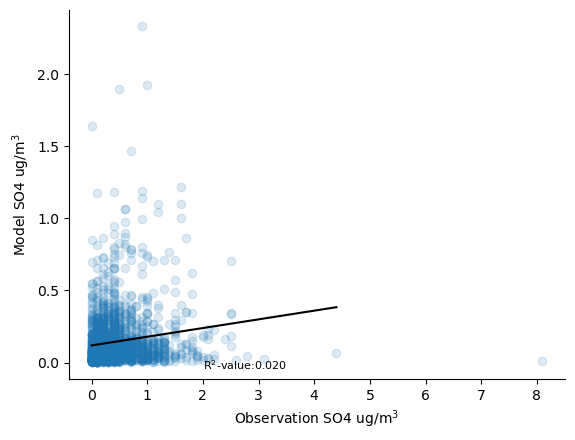

In [125]:
f, ax = plt.subplots()
ax.scatter(x = ALLDATA['SO4'], y = ALLDATA['SO4_tot'],alpha = 0.15)
_dss = ALLDATA.to_dataframe().dropna()
z = np.polyfit(_dss['SO4'], _dss['SO4_tot'], 1)
p = np.poly1d(z)
x= np.logspace(np.log10(_dss['SO4_tot'].min()), np.log10(_dss['SO4'].max()))
ax.plot( x, p(x), c = 'black', )
print(p)



plt.xlabel('Observation SO4 ug/m$^3$')
plt.ylabel('Model SO4 ug/m$^3$')

#Calculating R-Squared
x = np.array([_dss['SO4']]).reshape((-1, 1))
model = LinearRegression().fit (x, _dss['SO4_tot'])
r_sq = model.score(x, _dss['SO4_tot'])
ax.text(2.0, -0.05, f"R$^2$-value:{r_sq:.3f}"  ,fontsize=8)
#ax.text(0.3, 0.15, f"R$^2$-value:{r_sq}0.3f"  ,fontsize=8)
    
sns.despine(f)

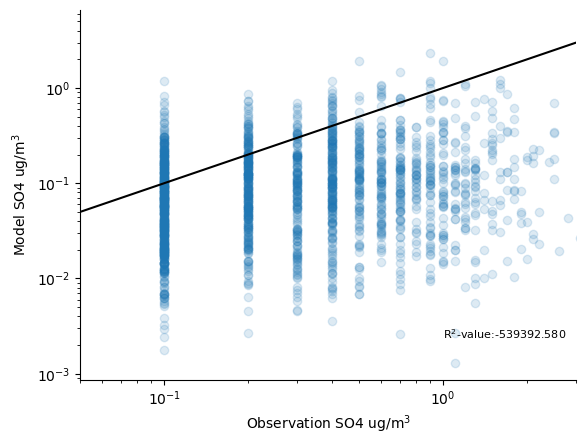

In [126]:
f, ax = plt.subplots()
ax.scatter(x = ALLDATA['SO4'], y = ALLDATA['SO4_tot'],alpha = 0.15)
_dss = ALLDATA.to_dataframe().dropna()
xscale ='log'
yscale = 'log'
z = np.polyfit(_dss['SO4'], _dss['SO4_tot'], 1)
p = np.poly1d(z)
x= np.logspace(np.log10(_dss['SO4_tot'].min()), np.log10(_dss['SO4'].max()))
ax.plot( x, x, c = 'black', )

plt.xlabel('Observation SO4 ug/m$^3$')
plt.ylabel('Model SO4 ug/m$^3$')
ax.set_yscale ('log')
ax.set_xscale ('log')
ax.set_xlim (0.05,3)

#Calculating R-Squared
_y = np.array(np.logspace(np.log10(_dss['SO4_tot'].min()), np.log10(_dss['SO4'].max()))).reshape((-1,1))
_x = np.array([_dss['N50']]).reshape((-1, 1))
model = LinearRegression().fit (_y, x)
r_sq = model.score(_x, _dss['SO4_tot'])
ax.text(1.0, 0.0023, f"R$^2$-value:{r_sq:.3f}"  ,fontsize=8)
#ax.text(0.3, 0.15, f"R$^2$-value:{r_sq}0.3f"  ,fontsize=8)
    
sns.despine()

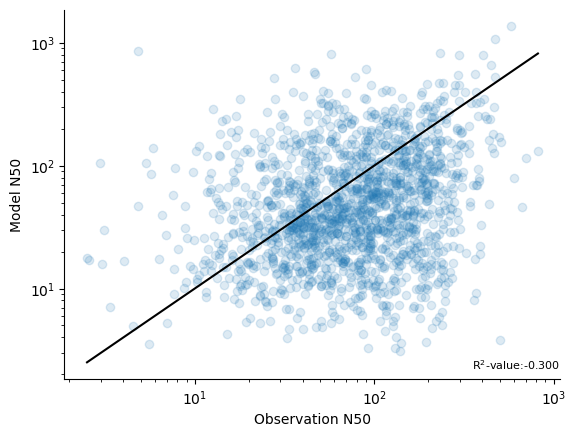

In [127]:
f, ax = plt.subplots()
ax.scatter(x = ALLDATA['N50'], y = ALLDATA['N50_Model'],alpha = 0.15)
_dss = ALLDATA.to_dataframe().dropna()
z = np.polyfit(_dss['N50'], _dss['N50_Model'], 1)
p = np.poly1d(z)
x= np.logspace(np.log10(_dss['N50'].min()), np.log10(_dss['N50'].max()))
ax.plot( x, x, c = 'black', )
#print(p)

ax.set_yscale ('log')
ax.set_xscale ('log')
plt.xlabel('Observation N50')
plt.ylabel('Model N50')

#Calculating R-Squared
_y = np.array(np.logspace(np.log10(_dss['N50'].min()), np.log10(_dss['N50'].max()))).reshape(-1,1)
_x = np.array([_dss['N50']]).reshape((-1, 1))
model = LinearRegression().fit (_y, x)
r_sq = model.score(_x, _dss['N50_Model'])
ax.text(350, 2.2, f"R$^2$-value:{r_sq:.3f}"  ,fontsize=8)
#ax.text(0.3, 0.15, f"R$^2$-value:{r_sq}0.3f"  ,fontsize=8)
    
sns.despine()

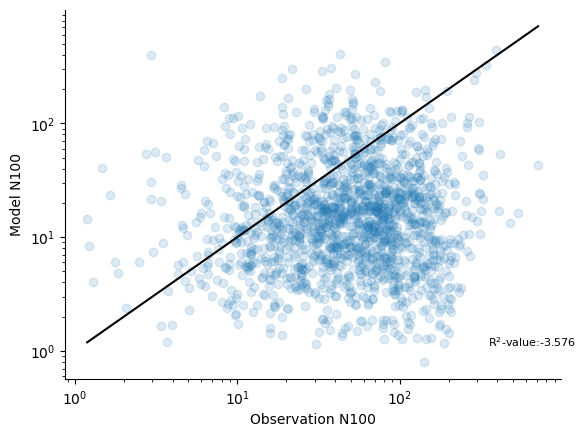

In [128]:
f, ax = plt.subplots()
ax.scatter(x = ALLDATA['N100'], y = ALLDATA['N100_Model'],alpha = 0.15)
_dss = ALLDATA.to_dataframe().dropna()
z = np.polyfit(_dss['N100'], _dss['N100_Model'], 1)
p = np.poly1d(z)
x= np.logspace(np.log10(_dss['N100'].min()), np.log10(_dss['N100'].max()))
ax.plot( x, x, c = 'black', )
#print(p)

ax.set_yscale ('log')
ax.set_xscale ('log')
plt.xlabel('Observation N100')
plt.ylabel('Model N100')

#Calculating R-Squared
_y = np.array(np.logspace(np.log10(_dss['N100'].min()), np.log10(_dss['N100'].max()))).reshape(-1,1)
_x = np.array([_dss['N100']]).reshape((-1, 1))
model = LinearRegression().fit (_y, x)
r_sq = model.score(_x, _dss['N100_Model'])
ax.text(350, 1.1, f"R$^2$-value:{r_sq:.3f}"  ,fontsize=8)
#ax.text(0.3, 0.15, f"R$^2$-value:{r_sq}0.3f"  ,fontsize=8)
    
sns.despine()

Flat line means that the model is underestimating the amount of something, steeper means that it is overestimating the amount present.\
A slope of 1 would be that NorESM models the variable perfectly.

## Histogram comparisons between the two variables

(array([8.050e+02, 1.664e+03, 9.820e+02, 7.720e+02, 7.440e+02, 4.280e+02,
        3.600e+02, 3.330e+02, 2.030e+02, 1.950e+02, 1.740e+02, 1.110e+02,
        9.900e+01, 9.500e+01, 3.500e+01, 4.800e+01, 2.800e+01, 2.500e+01,
        2.100e+01, 1.500e+01, 1.700e+01, 0.000e+00, 1.400e+01, 1.400e+01,
        5.000e+00, 3.000e+00, 1.000e+01, 5.000e+00, 0.000e+00, 4.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

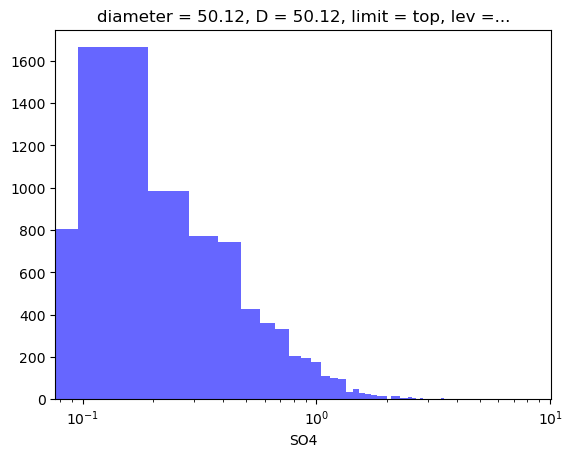

In [129]:
ALLDATA['SO4'].plot.hist(color ='blue', alpha = 0.6,bins = 85,
                         xscale = 'log',)
                         #bins=np.logspace(np.log10(ALLDATA['SO4'].min()),np.log10(ALLDATA['SO4'].min().max())))

(0.0, 4.0)

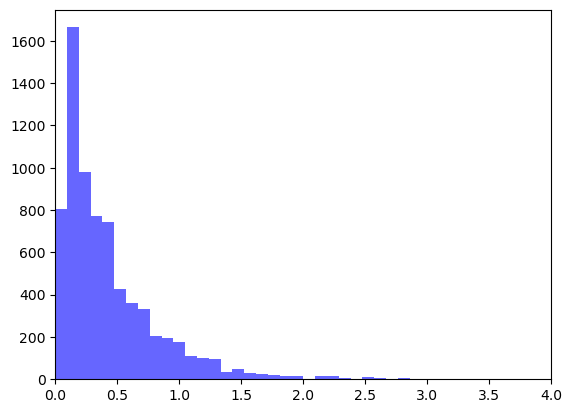

In [130]:
plt.hist(ALLDATA['SO4'], color ='blue', alpha = 0.6, bins = 85,)
plt.xlim (0,4)
#plt.set_xscale ='log'

(0.0, 3.0)

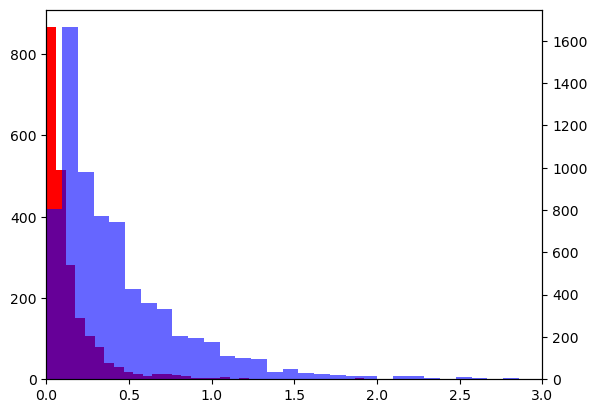

In [131]:
f, ax = plt.subplots()


ax.hist(ALLDATA['SO4_tot'], color = 'red',bins = 40)
ax2 = ax.twinx()
ax2.hist(ALLDATA['SO4'], color ='blue', alpha = 0.6, bins = 85)

ax.set_xlim ([0,3])
ax2.set_xlim ([0,3])

#plt.legend()
#plt.xlabel('SO4 ug/m$^3$')




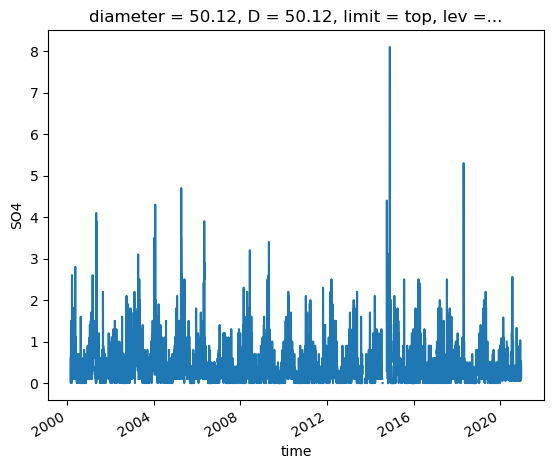

In [132]:
ALLDATA['SO4'].plot()

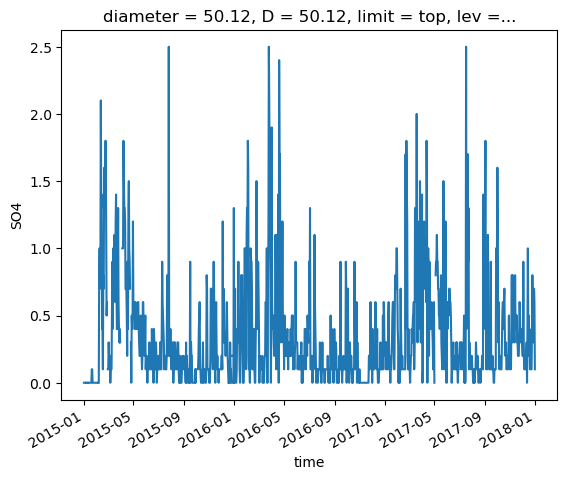

In [133]:
ALLDATA['SO4'].sel(time=slice('2015-01','2017-12')).plot()

Text(0, 0.5, 'Frequency in Measured (Blue)')

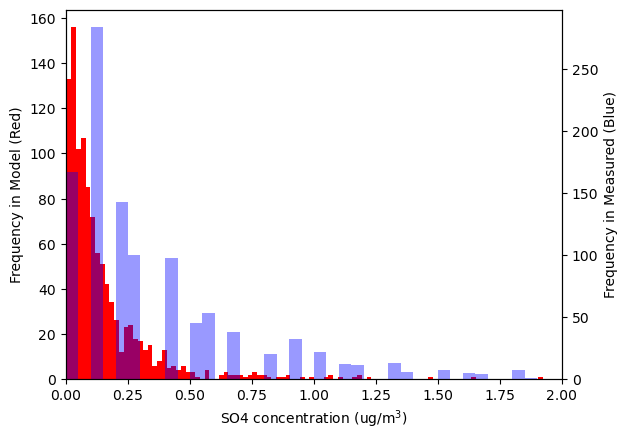

In [134]:
f, ax = plt.subplots()


ax.hist(ALLDATA['SO4_tot'].sel(time=slice('2015-01','2017-12')), color = 'red', bins = 100)
ax2 = ax.twinx()
ax2.hist(ALLDATA['SO4'].sel(time=slice('2015-01','2017-12')), color ='blue', alpha = 0.4, bins = 50)

ax.set_xlim ([0,2])
ax2.set_xlim ([0,2])
ax.set_xlabel('SO4 concentration (ug/m$^3$)')
ax.set_ylabel('Frequency in Model (Red)')
ax2.set_ylabel('Frequency in Measured (Blue)')


#plt.legend()
#plt.xlabel('SO4 ug/m$^3$')

Text(0, 0.5, 'Frequency in Measured(Blue)')

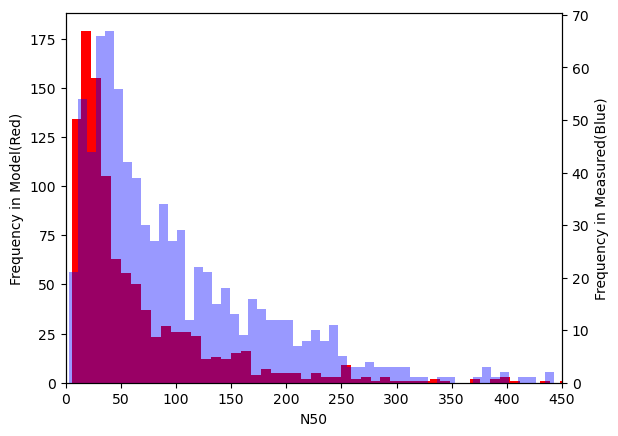

In [135]:
f, ax = plt.subplots()


ax.hist(ALLDATA['N50_Model'].sel(time=slice('2015-01','2017-12')), color = 'red', bins = 150)
ax2 = ax.twinx()
ax2.hist(ALLDATA['N50'].sel(time=slice('2015-01','2017-12')), color ='blue', alpha = 0.4, bins = 100)

ax.set_xlabel('N50') 
ax.set_xlim ([0,450])
ax.set_ylabel('Frequency in Model(Red)')
ax2.set_xlim ([0,450])
ax2.set_ylabel('Frequency in Measured(Blue)')

#plt.legend()

Text(0, 0.5, 'Frequency Observations (Blue)')

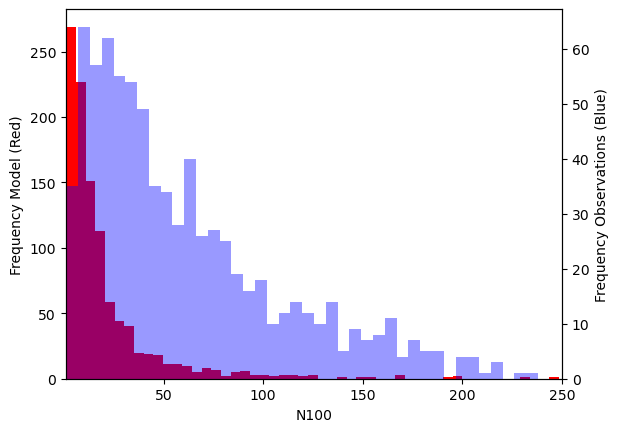

In [136]:
f, ax = plt.subplots()


ax.hist(ALLDATA['N100_Model'].sel(time=slice('2015-01','2017-12')), color = 'red', bins = 90)
#xscale = 'log'
ax2 = ax.twinx()
ax2.hist(ALLDATA['N100'].sel(time=slice('2015-01','2017-12')), color ='blue', alpha = 0.4, bins = 120)

ax.set_xlabel('N100') 
ax.set_xlim ([1,250])
ax.set_ylabel('Frequency Model (Red)')
ax2.set_xlim ([1,250])
ax2.set_ylabel('Frequency Observations (Blue)')
#plt.xscale('log')
#xscale = 'log'
#plt.xlabel ('N50')
